# Ucitavanje biblioteka

In [1]:
# ucitavanje biblioteka potrebnih za rad
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed()

# Ciljna funkcija

In [2]:
# definisanje ciljne funkcije 
def objective_function(x, y):
    
    """
    Opis: 
        Funkcija uzima ulazne parametre - koordinate x i y i
        za njih racuna vrednost ciljne funkcije.
        
    Parametri:
        x - x koordinata koordinatnog sistema
        y - y koordinata koordinatnog sistema
    
        
    Funkcija vraca vrednost ciljne funkcije za date x i y 
    koordinate.
    
    """
    
    f = 2 - 0.1*(np.cos(5*np.pi*x) + np.cos(5*np.pi*y)) - x**2 - y**2 
    
    return f

##  Iscrtavanje ciljne funkcije

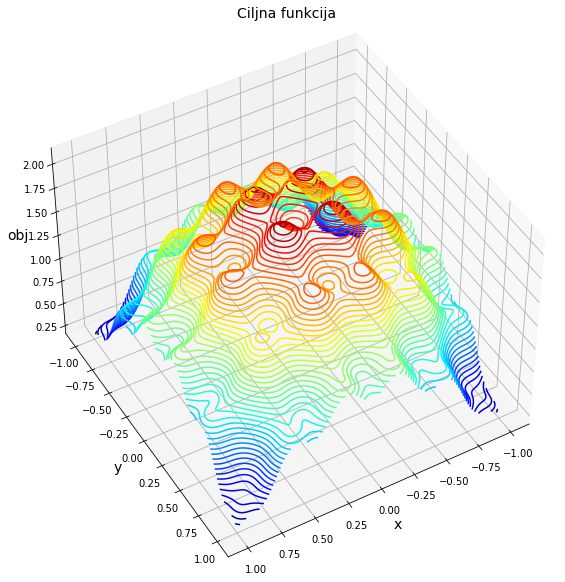

Maksimalna vrednost ciljne funkcije na intervalu za x i y [-1,1] je 2.12602


In [3]:
### Iscrtavanje ciljne funkcije

# definisanje broja bita kojima je odredjen broj tacaka za diskretizaciju osa
N_bits = 10

# definisanje broja tacaka za diskretizaciju osa 
N_points = 2**N_bits

# generisanje pseudokontinualnih osa x i y za intervale [-1 1]
x_axis_plt = np.linspace(-1, 1, N_points)
y_axis_plt = np.linspace(-1, 1, N_points)

# formiranje meshgrid-a za crtanje ciljne funkcije
X, Y = np.meshgrid(x_axis_plt, y_axis_plt)

# ciljna funkcija za crtanje 
Z = objective_function(X, Y) 

# crtanje ciljne funkcije
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.set_title('Ciljna funkcija', fontsize = 14)
ax.contour3D(X, Y, Z, 50, cmap='jet')
ax.set_xlabel('x', fontsize = 14)
ax.set_ylabel('y', fontsize = 14)
ax.set_zlabel('obj', fontsize = 14)
ax.view_init(45, 60)
plt.show()

# odredjivanje maksimalne vrednosti ciljne funkcije na datom intervalu x i y
max_value = Z.max()
print('Maksimalna vrednost ciljne funkcije na intervalu za x i y [-1,1] je ' + "{:.5f}".format(max_value))

# Diskretizacija osa i globalnih promenljivih

In [4]:
# definisanje broja bita kojima je odredjen broj tacaka za diskretizaciju osa
num_bits = 10

# definisanje broja tacaka za diskretizaciju osa 
points = 2**num_bits

# generisanje pseudokontinualnih osa x i y za intervale [-1 1]
x_axis= np.linspace(-1, 1, points)
y_axis = np.linspace(-1, 1, points)

# pakovanje osa u liste
x_axis = x_axis.tolist()
y_axis = y_axis.tolist()

# inicijalizacija liste za vrednosti ciljne funkcije uredjenim parovima 
# koji predstavljaju x i y koordinate
z_pairs = []

# racunanje ciljne funkcije za svaki par (x, y) i dodavanje u listu z_pairs
for x in range(points):
    for y in range(points):
        z_pairs.append([x, y, objective_function(x_axis[x], y_axis[y])])
        
# prebacivanje iz liste u niz sa 3 kolone i points vrsta 
# 1. kolona -> x ..  2. kolona -> y .. 3. kolona -> ciljna f-ja
z_pairs = np.array(z_pairs)

# Funkcije za generisanje naslednika (algoritmi: simulirano kaljenje i lokalna pretraga po snopu)

Posto su pomenuti algoritmi predstavnici algoritama lokalne pretraga, logican izbor naslednika jednog stanja bi bio da se generisu stanja iz bliske okoline trenutnog stanja. Sledecim funkcijama je upravo uradjeno to. 

In [5]:
# funkcija za generisanje jednog naslednika za algortime simuliranog kaljenja i lokalne pretrage po snopu
def successor_select(current_state, max_bias_x = 50, max_bias_y = 50):
    
    """
    Opis: 
        Funkcija prima ulazni parametar koji predstavlja trenutni cvor,
        odnosno trenutno stanje i na slucajan nacin vrsi izbor sledeceg
        cvora, koji je u blizini trenutnog. Ukoliko je prosledjeno trenutno 
        stanje jednako None, onda se od svih tacaka generise slucajno mesto
        za pocetak. Ovaj slucaj se desava kada nemamo pocetno stanje za neki 
        algoritam nego se on sam ovde generise.
        
    Parametri:
        current_state - trenutno stanje - lista [x, y]
        max_bias_x - maksimalni pomeraj po indeksima za x koordinatu
        max_bias_y - maksimalni pomeraj po indeksima za y koordinatu
        
        **** Default vrednosti za parametre max_bias_x i max_bias_y je 50
        **** Dakle po indeksima vrednost moze maksimalno da se pomeri za 
        **** (1-(-1)/points)*50 = 0.097 ~ +/-0.1
    
        
    Funkcija vraca listu [x, y] kao naslednika prosledjenog trenutnog stanja
    
    """
    
    # globalne promenljive koje predstavljaju x i y osu i broj tacaka za 
    # te ose
    global x_axis, y_axis, points
    
    # inicijalizacija novog stanja
    new_state = None
    
    # ukoliko ne postoji trenutno stanje
    # uzimamo slucajan izbor za x i y vrednosti
    if current_state == None:
        x_index_new = random.randint(0,points-1)
        y_index_new = random.randint(0,points-1)
        
        x_new = x_axis[x_index_new]
        y_new = y_axis[y_index_new]
        next_state = [x_new, y_new]
    
    # ukoliko poznajemo trenutno stanje,
    # na slucajan nacin uzimamo iz okoline trenutnog 
    # stanja neko drugo stanje 
    else:

        x_curr = current_state[0]
        y_curr = current_state[1]
        
        
        # uzimanje indeksa x i y koordinata za zadato trenutno stanje
        # upotrebljene su lambda funkcije posto generalno u pocetnom stanju
        # nekog algoritma se moze pogooditi da te vrednosti nisu u nasim
        # dikretizovanim osama

        x_index = x_axis.index(min(x_axis, key=lambda x:abs(x-x_curr)))
        y_index = y_axis.index(min(y_axis, key=lambda y:abs(y-y_curr)))
        
        # generisanje slucajnog indeksa iz intervala [-50 50]
        x_bias = random.randint(-max_bias_x, max_bias_x)
        y_bias = random.randint(-max_bias_y, max_bias_y)

        # indeks novog x-a
        x_index_new = x_index + x_bias

        # saturacija tog indeksa ukoliko ispadne iz opsega [0, points-1]
        if x_index_new < 0 :
            x_index_new = 0
        elif x_index_new >= points : 
            x_index_new = points-1

        # indeks novog y-a
        y_index_new = y_index + y_bias 

        # saturacija tog indeksa ukoliko ispadne iz opsega [0, points-1]
        if y_index_new < 0 :
            y_index_new = 0
        elif y_index_new >= points : 
            y_index_new = points-1

        # formiranje novog stanja
        x_new = x_axis[x_index_new]
        y_new = y_axis[y_index_new]
        next_state = [x_new, y_new]
        

    return next_state

# funkcija za proveru da li se vec naslednik nalazi u listi naslednika
# funkcija se koristi kod generisanja vise naslednika od jendog cvora
def check_if_successor_in_list(successor_list, successor):
    
    """
    Opis: 
        Funkcija prima ulazne parametre i vrsi proveru da li se u listi
        naslednika nalazi prosledjeni naslednik.
        
    Parametri:
        successor_list - lista naslednika
        successor - naslednik kojeg treba proveriti
        
    Funkcija vraca True/False vrednost ukoliko se naslednik nalazi, odnosno ne
    nalazi u listi.
    
    """
    
    # provera po svim naslednicima iz liste naslednika
    cnt = 0
    for i in range(len(successor_list)):
        if (successor_list[i][0] != successor[0]) and (successor_list[i][1] != successor[1]):
            cnt +=1
     
    # ukoliko prosledjeni naslednik ne postoji u listi
    # vracamo False
    if len(successor_list) == cnt:
        return False
    
    # u suprotnom vracamo True
    return True

# funkcija za generisanje vise naslednika za algortiam lokalne pretrage po snopu
def multiple_successor_select(current_state, k, interrupt_loop_counter = 10):
    
    """
    Opis: 
        Funkcija prima ulazni parametar koji predstavlja trenutni cvor,
        odnosno trenutno stanje i na slucajan nacin vrsi izbor k sledecih
        cvorova, koji su u blizini trenutnog. Takodje, ukoliko se odaberu 
        dva ista stanja onda funkcija pokusava kroz nekoliko iteracija da 
        izbegne taj slucaj, medjutim garancija da su sva stanja medjusobno 
        razlicita nije moguca.
        
    Parametri:
        current_state - trenutno stanje - lista [x, y]
        k - broj naslednika koji se generisu iz trenutnog stanja
        interrupt_loop_counter - broj iteracija while petlje za promenu 
                                 izabranog stanja u slucaju da to izabrano stanje 
                                 vec postoji 
        
        **** Default vrednost za parametar interrupt_loop_counter je 10.
    
        
    Funkcija vraca listu k stanje definisanih listama [x, y] kao naslednika 
    trenutnog stanja.
    
    """
    
    # inicijalizacija liste novih stanja
    new_states = []

    # petlja za generisanje novih k stanja
    for i in range(k):
        
        # resetovanje brojaca koji treba da vodi racuna
        # o broju iteracija petlje koja sluzi kao mehanizam 
        # za nedupliranje stanja u listi naslednika
        cnt = 0
        
        # generisanje jednog novog naslednika od trenutnog stanja
        new_successor = successor_select(current_state)
        
        # provera da li generisano novo stanje vec postoji u listi
        # naslednika -> ukoliko ne postoji onda ga dodajemo u listu naslednika
        if check_if_successor_in_list(new_states, new_successor) == False :
            new_states.append(new_successor)
            
        # ukoliko novo generisano stanje vec postoji u listi naslednika
        # onda radimo sledece
        else:
            # zavrtimo petlju sve dok interni brojac ne postane jednak 
            # parametru funkcije - interrupt_loop_counter-u koji sluzi da
            # se ne trose resursi
            while cnt < interrupt_loop_counter:
                
                # ponovo generisemo novog naslednika
                new_successor = successor_select(current_state)

                # inkrementiramo interni brojac
                cnt +=1 

                # ponovo proveravamo da li novogenerisani naslednik postoji u lisit
                # naslednika -> ukoliko ne postoji dodajemo i prekidamo ovu petlju
                # -> ukoliko postoji u listi, onda ponovo pozivamo ovu petlju ne bi
                # li smo sada dobili dobrog naslednika
                if check_if_successor_in_list(new_states, new_successor) == False :

                    new_states.append(new_successor)
                    break
    
    return new_states

## Prikaz rezultata za generisanje suseda

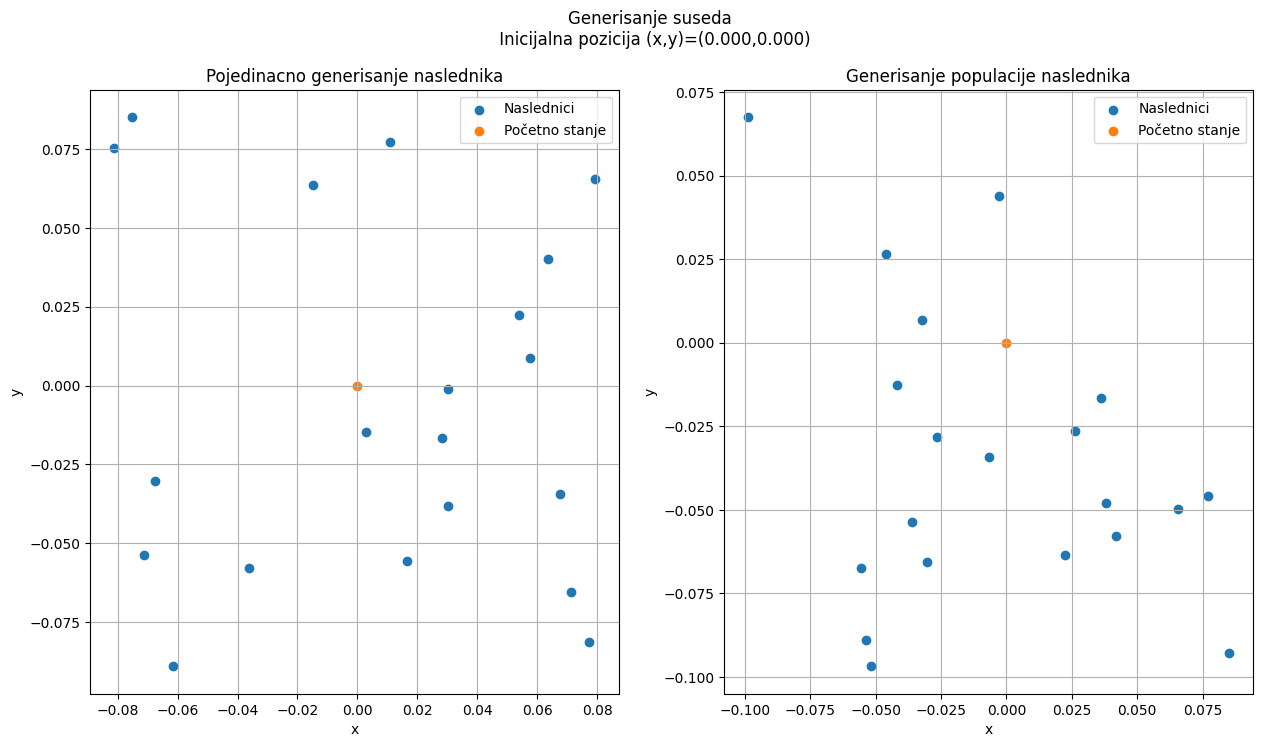

In [6]:
# generisanje jednog naslednika 

# pocetno stanje
init_state = [0, 0]

num = 20

successors_individual = []

# generisanje 'num' naslednika od pocetnog stanja pojedinacnim pozivanjem 
# funkcije za generisanje naslednika
for i in range(num):
    successors_individual.append(successor_select(init_state))
    
# pretvaranje liste u niz za laske rukovanje
successors_individual = np.array(successors_individual)

# generisanje populacije naslednika
successors_multiple = multiple_successor_select(init_state, num)
# pretvaranje liste u niz za laske rukovanje
successors_multiple = np.array(successors_multiple)

# icrtavanje generisanih naslednika
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,8), dpi = 100)

plt.suptitle('Generisanje suseda \n Inicijalna pozicija (x,y)=(%.3f,%.3f)' %(init_state[0],init_state[1]))

ax[0].scatter(successors_individual[:,0], successors_individual[:,1])
ax[0].scatter(init_state[0], init_state[1])
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title('Pojedinacno generisanje naslednika')
ax[0].legend(["Naslednici", "Početno stanje"], loc = 'upper right')
ax[0].grid('minor')

ax[1].scatter(successors_multiple[:,0], successors_multiple[:,1])
ax[1].scatter(init_state[0], init_state[1])
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title('Generisanje populacije naslednika')
ax[1].legend(["Naslednici", "Početno stanje"], loc = 'upper right')
ax[1].grid('minor')

plt.show()

# Simulirano kaljenje

Kod algoritma simulirano kaljenje je vrlo bitan tzv. redosled hladjenja. Maksimalna temperatura kao i korak hladjenja, odnosno spustanja temperature do nule bi trebalo da bude ni premali ni preveliki. U nastavku ce biti razmatrana vrednost koraka i maksimalne temperature koja se pokazala kao vrlo adekvatna. 
Simulirano kaljenje sa povremenim vracanjem u najbolje stanje kao modifikacija algoritma SK, je implementiran tako da se sa nekom malom verovatnocom 
tok algoritma povremeno vrati u do sada najbolje zapamceno stanje, dakle nisu razmatrani brojevi iteracija koji bi bili adekvatni i posle kojih bi se algoritam vracao u najbolje stanje, vec se pristupilo ovom 'stohastickom' principu. Performanse ove modifikacije su se pokazale bolje, doduse za nijansu u odnosu na klasican SK algoritam, a to se najvise ogleda u pronadjenom najboljem resenju. 

In [7]:
# funkcija za generisanje redosleda hladjenja 
def cooling_schedule(Tmax, cooling_step):
    
    """
    Opis: 
        Funkcija prima ulazne parametre na osnovu kojih formira
        listu u kojoj se nalaze odgovarajuce temperature za 
        svaku iteraciju.
        
    Parametri:
        Tmax - maksimalna temperatura od koje pocinje proces hladjenja
        cooling_step - korak sa kojim se temperatura spusta sve do nule
        
    Funkcija vraca listu parova iteracije i temperature u toj iteraciji.
    
    """
    
    # inicijalizacija liste
    temp_iter_pairs = []
    
    # broj razlictih temperatura definisan maksimalnom temperaturom i 
    # korakom hladjenja
    num_points = int(Tmax/cooling_step)

    # formiranje linearnog rasporeda hladjenja 
    cooling = np.linspace(Tmax, 0, num_points)
    
    # pakovanje iteracije i temperature u listu
    for i in range(num_points):
        temp_iter_pairs.append([i, cooling[i]])

    return temp_iter_pairs

# funkcija za proveru losijeg resenja 
def delta_check(delta, T_current):
    
    """
    Opis: 
        Funkcija prima ulazne parametre i simulacijom
        bacanja novcica odlucuje da li se trenutno resenje koje
        nije dalo uvecanje prema maksimumu ciljne funkcije prihvata 
        ili ne.
        
    Parametri:
        delta - razlika ciljnih funkcija trenutnog i novog stanja 
                (negativna, posto je potrebno ciljnu funkciju maksimizirati)
        T_current - trenutna temperatura na kojoj dolazi da slucaja da je 
                    novo ciljno stanje losije od trenutnog
        
    Funkcija 0 ili 1 kao rezultat simulacije bacanja novcica sa verovatnocom
    uspeha odredjenom ulaznim parametrima. Dakle, ukoliko funkcija vrati 1 
    losije resenje se prihvata, a za 0 suprotno.
    
    """
    
    # ukoliko je trenutna temperatura jednaka nuli 
    # verovatnoca prihvatanja novo stanja je nula
    if T_current == 0 :
        pr = 0

    # ukoliko je temperatura razlicita od nule racunamo 
    # verovatnocu prihvatanja resenja
    else :
        # delta se skalira sa koeficijentom 100
        
        # veliko delta - velika greska -> kad se skalira (za bilo koju temperaturu) 
        # dobija se verovatnoca koja je mala sto znaci da se resenje tesko prihvata
        
        # malo delta - mala greska -> kad se skalira, za velike temperature, daje veliku verovatnocu
        # dok za male temperature daje male verovatnoce, sto odgovara opisu alogirtma
        delta = delta*100
        
        # racunanje verovatnoce uspeha
        pr = np.exp(delta/T_current)
        
    # simuliranje bacanja novica sa prethodno izracunatom verovatnocom uspeha - pr
    result = np.random.binomial(1,pr)

    return result
    
# funkcija - implementacija algoritma simulirano kaljenje
def simulated_annealing(init_state, cooling_schedule, num_iter, p_return_to_best = 0, tolerancy = 1e-5, print_display = True):
    
    """
    Opis: 
        Funkcija predstavlja implementaciju algoritama simulirano kaljenje i 
        simuliranog kaljenje sa povremenim vracanjem u najbolje stanje.
        
    Parametri:
        init_state - lista [x, y] koji predstavljaju pocetno stanje
        cooling_schedule - lista temperatura kojima je predstavljen proces hladjenja
        num_iter - broj iteracija unutar procesa hladjenja, dakle za jednu temperaturu 
                   imamo num_iter iteracija 
        p_return_to_best - mala verovatnoca sa kojom se vracamo u najbolje stanje 
        tolerancy - parametar kojim se definise tolerancija iznalazenja najboljeg stanja
        print_display - parametar za prikazivanje printova
        
        **** Default vrednost parametra p_return_to_best je 0, ondosno za takvu vrednost
             ovog parametra, ovaj algoritam predstavlja klasican algoritam simuliranog kaljenja,
             dakle bez vracanja na najbolje stanje.
        **** Default vrednost parametra tolerancy je postavljena na 10^-5.
        **** Default vrednost parametra print_display je True.
             
    Funkcija vraca najbolje stanje, dakle ono u kojem je pronasla maksimalnu vrednost ciljne funkcije
    ili neku vrednost vrlo blizu maksimalne. 
    Pored toga funkcija vracanja i listu svih trenutnih stanja i broj iteracija do optimalnog resenja.
    
    """
    
    # inicijalizacija najboljeg stanja i najbolje vrednosti ciljne funkcije 
    # na pocetku algoritma
    best_state = None
    best_objective_value = 0
    
    # inicijalizacija trenutnog stanja
    # na pocetku algoritma trenutno stanje postavljamo na pocetno stanje
    # koje je prosledjeno kao ulazni parametar
    current_state = init_state
    
    # inicijalizacija promenljive za pracenje broja 
    # iteracije u kojoj dodje do najboljeg resenja / broja generisanih kandidata
    iteration = 0
    
    # inicijalizacije liste za pracenje vrednosti ciljne funkcije trenutnog stanja
    states_list = [objective_function(init_state[0], init_state[1])]
    
    # petlja koja simulira hladjenje 
    for k in range(len(cooling_schedule)):
        
        # dohvatanje trenutne temperature 
        Tk = cooling_schedule[k][1]
        
        # ovaj deo algoritma predstavlja modifikaciju, dakle 
        # simulirano kaljenje sa povremenim vracanjem na najbolje stanje
        # dakle generise se slucajan broj iz intervala (0,1) i ukoliko je 
        # taj broj manji od ulazne verovatnoce, onda se algoritam povremeno
        # vrati na najbolje stanje ---- dakle, ovaj pristup nije zasnovan 
        # na principu da se nakon nekoliko iteracija ili na nekoj temperaturi 
        # algoritam vrati u najbolje stanje, vec se sa nekom malom verovatnocom
        # povremenom vrati u najbolje stanje
        rnd = random.random()
        
        # provera da li se vracamo u najbolje stanje
        if (rnd < p_return_to_best) and (best_state != None):
            current_state = best_state
            best_objective_value = objective_function(best_state[0], best_state[1])
            
            if print_display == True:
                print('Povratak na najbolje stanje ->  T = %.3f' %Tk  + ', vrednost = %.5f' %best_objective_value)
        
        # petlja koja se vrti za svaku konkretnu temperaturu iz cooling_schedule-a
        for current_iter in range(num_iter):
            
            x_current = current_state[0]
            y_current = current_state[1]

            # racunanje vrednosti ciljne funkcije za trenutno stanje
            objective_current = objective_function(x_current, y_current)

            # generisanje naslednika trenutnog stanja - novo stanje
            new_state = successor_select(current_state)
            x_new = new_state[0]
            y_new = new_state[1]

            # racunanje vrednosti ciljne funkcije za novo stanje
            objective_new = objective_function(x_new, y_new)

            # racunanje razlike vrednosti ciljne funkcije za novo i trenutno stanje - delta
            delta = objective_new - objective_current
            
            # ukoliko smo dobili naslednika koji ima vecu vrednost ciljne funkcije
            # to stanje postavljamo kao novo najbolje
            if (objective_new - best_objective_value) > tolerancy :
                best_state = new_state
                best_objective_value = objective_new
                
                # update-ovanje promenljive za pracenje broja kandidata
                iteration = k*num_iter + current_iter
                
                if print_display == True:
                    print('Novo najbolje stanje ->  T = %.3f' %Tk +  ', iteracija = ' + str(current_iter) + ', vrednost = %.5f' %best_objective_value)
            
            # za trenutno stanje postavljamo ovo novo stanje ukoliko je ono bolje ili jednako
            # od trenutnog stanja
            if delta >= 0:
                current_state = new_state
            else :
                # u slucaju da se generisalo losije stanje
                # onda njega prihvatamo sa verovatnocom koju racunamo na osnovu 
                # dobijenog delta i trenutne temperature
                
                check = delta_check(delta, Tk)

                if check == 1 :
                    current_state = new_state
                    
            states_list.append(objective_function(current_state[0], current_state[1]))
        
    return [best_state, best_objective_value, states_list, iteration]

## Prikaz rezultata algoritma simulirano kaljenje (sa povremenim vracanjem na najbolje stanje)

In [8]:
### TESTIRANJE RADA ALGORITMA SIMULIRANO KALJENJE I SUMILARANO KALJENJE SA MODIFIKACIJOM

# maksimalna temperatura od koje pocinje proces hladjenja
Tmax = 20

# generisanje brzog procesa hladjenja
fast_step = 2
fast =  cooling_schedule(Tmax, fast_step)

# generisanje sredje brzog procesa hladjenja 
medium_step = 0.2
medium =  cooling_schedule(Tmax, medium_step)

# generisanje sporog procesa hladjenja
slow_step = 0.02
slow =  cooling_schedule(Tmax, slow_step)

# postavljanje broja iteracija 
num_iter = 50

# pocetno stanje od koga krecemo sa ovim algoritmom
init_state = [-0, 0]

print('##################################################################')
print('##################################################################')
print('---------------------- Simulirano kaljenje -----------------------')

print('------------------------------------------------------------------')
print('--> Brzo opadanje temperature - korak = '+ "{:.2f}".format(fast_step))
fast_result, fast_sa_maxima, states, it = simulated_annealing(init_state, fast, num_iter)
print('------------------------------------------------------------------')
print('Iteracija u kojoj je najbolja vrednost pronadjena: ' + str(it) + '/' + str(int((Tmax/fast_step)*num_iter)))
print('Broj generisanih kandidata do pronalaska najbolje vrednosti: ' + str(it))
print('Pronadjena maksimalna vrednost ciljne funkcije iznosi ' + "{:.5f}".format(fast_sa_maxima))
print('Vrednost x i y za dobijeni maksimum su : x = '+ "{:.5f}".format(fast_result[0]) + ' i y = ' + "{:.5f}".format(fast_result[1]))
print('\n')

print('------------------------------------------------------------------')
print('--> Medijalno brzo opadanje temperature - korak = '+ "{:.2f}".format(medium_step))
medium_result, medium_sa_maxima, states, it = simulated_annealing(init_state, medium, num_iter)
print('------------------------------------------------------------------')
print('Iteracija u kojoj je najbolja vrednost pronadjena: ' + str(it) + '/' + str(int((Tmax/medium_step)*num_iter)))
print('Broj generisanih kandidata do pronalaska najbolje vrednosti: ' + str(it))
print('Pronadjena maksimalna vrednost ciljne funkcije iznosi ' + "{:.5f}".format(medium_sa_maxima))
print('Vrednost x i y za dobijeni maksimum su : x = '+ "{:.5f}".format(medium_result[0]) + ' i y = ' + "{:.5f}".format(medium_result[1]))
print('\n')

print('------------------------------------------------------------------')
print('--> Sporo opadanje temperature - korak = '+ "{:.2f}".format(slow_step))
slow_result, slow_sa_maxima, states, it = simulated_annealing(init_state, slow, num_iter)
print('------------------------------------------------------------------')
print('Iteracija u kojoj je najbolja vrednost pronadjena: ' + str(it) + '/' + str(int((Tmax/slow_step)*num_iter)))
print('Broj generisanih kandidata do pronalaska najbolje vrednosti: ' + str(it))
print('Pronadjena maksimalna vrednost ciljne funkcije iznosi ' + "{:.5f}".format(slow_sa_maxima))
print('Vrednost x i y za dobijeni maksimum su : x = ' + "{:.5f}".format(slow_result[0]) + ' i y = ' + "{:.5f}".format(slow_result[1]))

print('\n\n')
print('##################################################################')
print('##################################################################')
print('------- Simulirano kaljenje sa vracanjem na najbolje stanje ------')
print('##################################################################')

p_return_to_best_fast = 0.2
print('------------------------------------------------------------------')
print('--> Brzo opadanje temperature - korak = '+ "{:.2f}".format(fast_step))
print('Verovatnoca vracanja na najbolje stanje : ' + str(p_return_to_best_fast))
print('------------------------------------------------------------------')
fast_with_return_result, fast_with_return_sa_maxima, states, it = simulated_annealing(init_state, fast, num_iter, p_return_to_best_fast)
print('------------------------------------------------------------------')
print('Iteracija u kojoj je najbolja vrednost pronadjena: ' + str(it) + '/' + str(int((Tmax/fast_step)*num_iter)))
print('Broj generisanih kandidata do pronalaska najbolje vrednosti: ' + str(it))
print('Pronadjena maksimalna vrednost ciljne funkcije iznosi ' + "{:.5f}".format(fast_with_return_sa_maxima))
print('Vrednost x i y za dobijeni maksimum su : x = '+ "{:.5f}".format(fast_with_return_result[0]) + ' i y = ' + "{:.5f}".format(fast_with_return_result[1]))
print('\n')

p_return_to_best_medium = 0.1
print('------------------------------------------------------------------')
print('--> Medijalno brzo opadanje temperature - korak = '+ "{:.2f}".format(medium_step))
print('Verovatnoca vracanja na najbolje stanje : ' + str(p_return_to_best_medium))
print('------------------------------------------------------------------')
medium_with_return_result, medium_with_return_sa_maxima, states, it = simulated_annealing(init_state, medium, num_iter, p_return_to_best_medium)
print('------------------------------------------------------------------')
print('Iteracija u kojoj je najbolja vrednost pronadjena: ' + str(it) + '/' + str(int((Tmax/medium_step)*num_iter)))
print('Broj generisanih kandidata do pronalaska najbolje vrednosti: ' + str(it))
print('Pronadjena maksimalna vrednost ciljne funkcije iznosi ' + "{:.5f}".format(medium_with_return_sa_maxima))
print('Vrednost x i y za dobijeni maksimum su : x = '+ "{:.5f}".format(medium_with_return_result[0]) + ' i y = ' + "{:.5f}".format(medium_with_return_result[1]))
print('\n')

p_return_to_best_slow = 0.01
print('------------------------------------------------------------------')
print('--> Sporo opadanje temperature - korak = '+ "{:.2f}".format(slow_step))
print('Verovatnoca vracanja na najbolje stanje : ' + str(p_return_to_best_slow))
print('------------------------------------------------------------------')
slow_with_return_result, slow_with_return_sa_maxima, states, it = simulated_annealing(init_state, slow, num_iter, p_return_to_best_slow)
print('------------------------------------------------------------------')
print('Iteracija u kojoj je najbolja vrednost pronadjena: ' + str(it) + '/' + str(int((Tmax/slow_step)*num_iter)))
print('Broj generisanih kandidata do pronalaska najbolje vrednosti: ' + str(it))
print('Pronadjena maksimalna vrednost ciljne funkcije iznosi ' + "{:.5f}".format(slow_with_return_sa_maxima))
print('Vrednost x i y za dobijeni maksimum su : x = '+ "{:.5f}".format(slow_with_return_result[0]) + ' i y = ' + "{:.5f}".format(slow_with_return_result[1]))

##################################################################
##################################################################
---------------------- Simulirano kaljenje -----------------------
------------------------------------------------------------------
--> Brzo opadanje temperature - korak = 2.00
Novo najbolje stanje ->  T = 20.000, iteracija = 0, vrednost = 1.88257
Novo najbolje stanje ->  T = 20.000, iteracija = 1, vrednost = 2.02913
Novo najbolje stanje ->  T = 20.000, iteracija = 35, vrednost = 2.04591
Novo najbolje stanje ->  T = 20.000, iteracija = 36, vrednost = 2.05408
Novo najbolje stanje ->  T = 20.000, iteracija = 37, vrednost = 2.09664
Novo najbolje stanje ->  T = 20.000, iteracija = 39, vrednost = 2.11197
Novo najbolje stanje ->  T = 17.778, iteracija = 0, vrednost = 2.12313
Novo najbolje stanje ->  T = 17.778, iteracija = 4, vrednost = 2.12471
------------------------------------------------------------------
Iteracija u kojoj je najbolja vrednost pronadjen

## Prikaz rezultata algoritma simulirano kaljenje

In [9]:
### FORMIRANJE EKSPERIMENTA ZA ALGORITAM SIMULIRANO KALJENJE

# maksimalna temperatura od koje pocinje proces hladjenja
Tmax = 20

# definisanje koraka za hladjenje
cooling_steps = [2, 0.5, 0.01]

# definisanje broja iteracija
num_iter = 50

# broj eksperimenata
N_exp = 100

# lista vrednosti ciljnih funkcija za pracenje
exp_states = []

# prolazak kroz razlicite korake hladjenja
for cooling_step in cooling_steps: 
    
    # generisanje rasporeda hladjenja
    cool = cooling_schedule(Tmax, cooling_step)
    
    # inicijalizacije niza za vrednosti ciljne funkcije
    states = np.zeros((1, int((Tmax/cooling_step)* num_iter+1)))
    
    # prolazak kroz realizacije
    for i in range(N_exp):
        
        # ispis trenutne iteracije
        if (i != (N_exp-1)):
            print("Korak hladjenja %.2f, Realizacija %d/%d" %(cooling_step,i+1,N_exp), end='\r')
        else:
            print("Korak hladjenja %.2f, Realizacija %d/%d" %(cooling_step,i+1,N_exp), end='\n')
            
        # pocetno stanje od koga krecemo sa ovim algoritmom
        x_init = random.random()*2-1
        y_init = random.random()*2-1
        
        init_state = [x_init, y_init]
        
        # poziv funkcije za simulirano kaljenje
        best_state, best_state_objective_value, states_list, it =  simulated_annealing(init_state, cool, num_iter, print_display = False)

        states += np.array(states_list).reshape((1,int((Tmax/cooling_step)* num_iter+1)))
    
    # usrednjavanje po realizacijama
    exp_states.append((states/N_exp).flatten().tolist())
    

Korak hladjenja 2.00, Realizacija 100/100
Korak hladjenja 0.50, Realizacija 100/100
Korak hladjenja 0.01, Realizacija 100/100


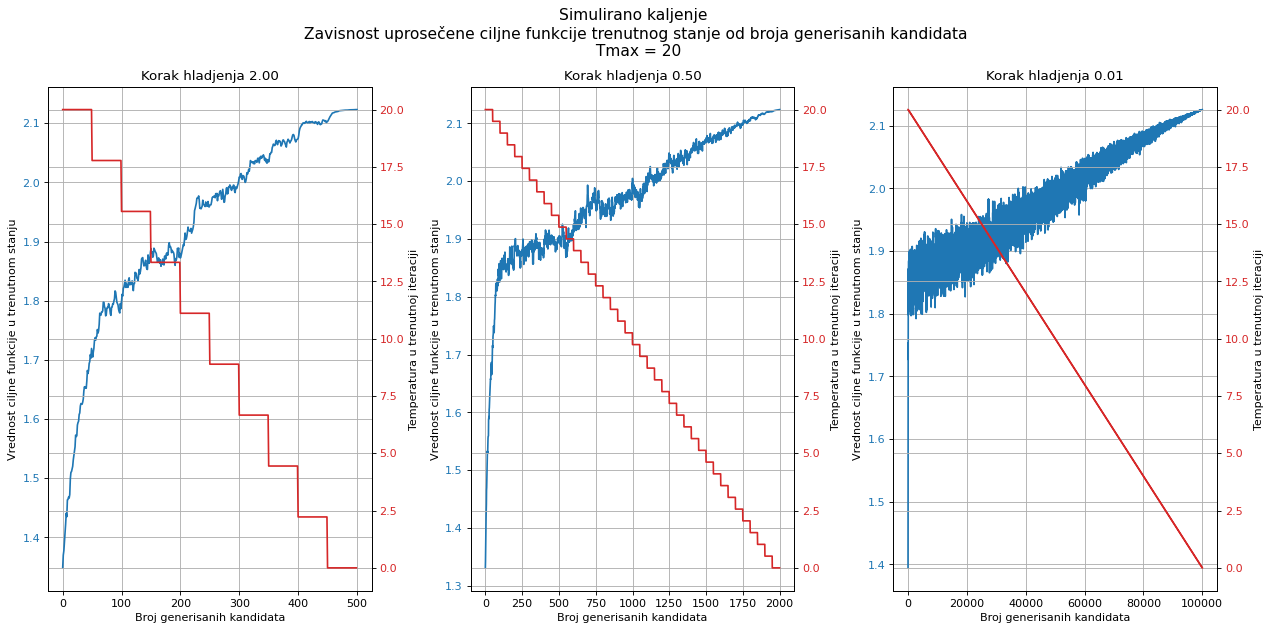

In [10]:
### ISCRTAVANJE REZULTATA ZA EKSPERIMENT SA SIMULIRANIM KALJENJEM

# formiranje listi za iteracije i hladjenja
iterations = []
coolings = []
for cooling_step in cooling_steps:
    iterations.append(np.arange(0,int((Tmax/cooling_step)*num_iter+1)))

    cooling_process = cooling_schedule(Tmax, cooling_step )

    extended_cooling = []

    for i in range(len(cooling_process) * num_iter):
        extended_cooling.append(cooling_process[i//num_iter][1])
        
    coolings.append(np.array(extended_cooling))
    
# iscrtavnje rezultata i redosleda hladjenja
fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize= (16,8), dpi = 80)
ax = axes.ravel()
plt.suptitle('Simulirano kaljenje \n Zavisnost uprosečene ciljne funkcije trenutnog stanje od broja generisanih kandidata \n Tmax = ' + str(Tmax), fontsize = 14)

for i in range(len(cooling_steps)):
    ax[i].plot(np.array(iterations[i]), exp_states[i])
    
    ax[i].tick_params(axis='y', labelcolor='tab:blue')    
    ax[i].set_title("Korak hladjenja %.2f" %cooling_steps[i])
    ax[i].set_ylabel('Vrednost ciljne funkcije u trenutnom stanju')
    ax[i].set_xlabel('Broj generisanih kandidata')
    ax[i].grid('minor')
    
    ax2 = ax[i].twinx()
    
    ax2.tick_params(axis='y', labelcolor='tab:red')    
    ax2.plot(np.arange(0,len(coolings[i])), coolings[i], color = 'tab:red')
    ax2.set_ylabel('Temperatura u trenutnoj iteraciji')
    ax2.grid('minor')
    
plt.tight_layout()
plt.show()

Sa dobijenih grafika vidimo da kada je korak pri hladjenju veliki dobijamo nesto losije krajnje resenje usrednjeno po realizacijama i da se tada algoritam pomalo i muci da se popne iz pocetnog stanja. Kod drugog grafika, gde je otprilike optimalna vrednost za korak hladjenja, vidimo da algoritam vrlo brzo skace do neke vrednosti, a svako sledece stanje kroz iteracije se sve vise i vise priblizava maksimumu funkcije. Vrlo slican slucaj je i kod poslednjeg grafika, gde imamo mnogo mali korak hladjenja. Dakle, algoritam prvo brzo skace do neke vrednosti ciljne funkcije, a posle malo 'sara' u nekoj okolini, medjutim ta okolina se u toku iteracija suzava sve vise, sto je i ocekivano.

## Prikaz rezultata algoritma simulirano kaljenje sa povremenim vracanjem na najbolje stanje

In [11]:
### FORMIRANJE EKSPERIMENTA ZA ALGORITAM SIMULIRANO KALJENJE sa MODIFIKACIJOM
 
# maksimalna temperatura 
Tmax = 20

# definisanje koraka hladjenja
cooling_steps = [2, 0.5, 0.01]

# definisanje verovatnoca za povratak na najbolje stanje
propabilities = [0.2, 0.1, 0.05]

# definisanje broja iteracija
num_iter = 50

# broj eksperimenata
N_exp = 100

# lista za vrednosti ciljne funkcije
exp_states = []

# prolazak kroz razlicite korake hladjenja
for j in range(len(cooling_steps)): 
    
    # generisanje redosleda hladjenja
    cool = cooling_schedule(Tmax, cooling_steps[j])
    
    # inicijalizacije niza za vrednosti ciljne funkcije
    states = np.zeros((1, int((Tmax/cooling_steps[j])* num_iter+1)))
    
    # prolazak kroz realizacije
    for i in range(N_exp):
        
        # ispis trenutne iteracije
        if (i != (N_exp-1)):
            print("Korak hladjenja %.2f, Verovatnoca vracanja nazad %.2f, Realizacija %d/%d" %(cooling_steps[j], propabilities[j], i+1,N_exp), end='\r')
        else:
            print("Korak hladjenja %.2f, Verovatnoca vracanja nazad %.2f, Realizacija %d/%d" %(cooling_steps[j], propabilities[j], i+1,N_exp), end='\n')
            
        # pocetno stanje od koga krecemo sa ovim algoritmom
        x_init = random.random()*2-1
        y_init = random.random()*2-1
        
        init_state = [x_init, y_init]
        
        # poziv funkcije za simulirano kaljenje sa modifikacijom
        best_state, best_state_objective_value, states_list, it =  simulated_annealing(init_state, cool, num_iter, propabilities[j], print_display = False)

        states += np.array(states_list).reshape((1,int((Tmax/cooling_steps[j])* num_iter+1)))
    
    # usrednjavanje po realizacijama
    exp_states.append((states/N_exp).flatten().tolist())
  

Korak hladjenja 2.00, Verovatnoca vracanja nazad 0.20, Realizacija 100/100
Korak hladjenja 0.50, Verovatnoca vracanja nazad 0.10, Realizacija 100/100
Korak hladjenja 0.01, Verovatnoca vracanja nazad 0.05, Realizacija 100/100


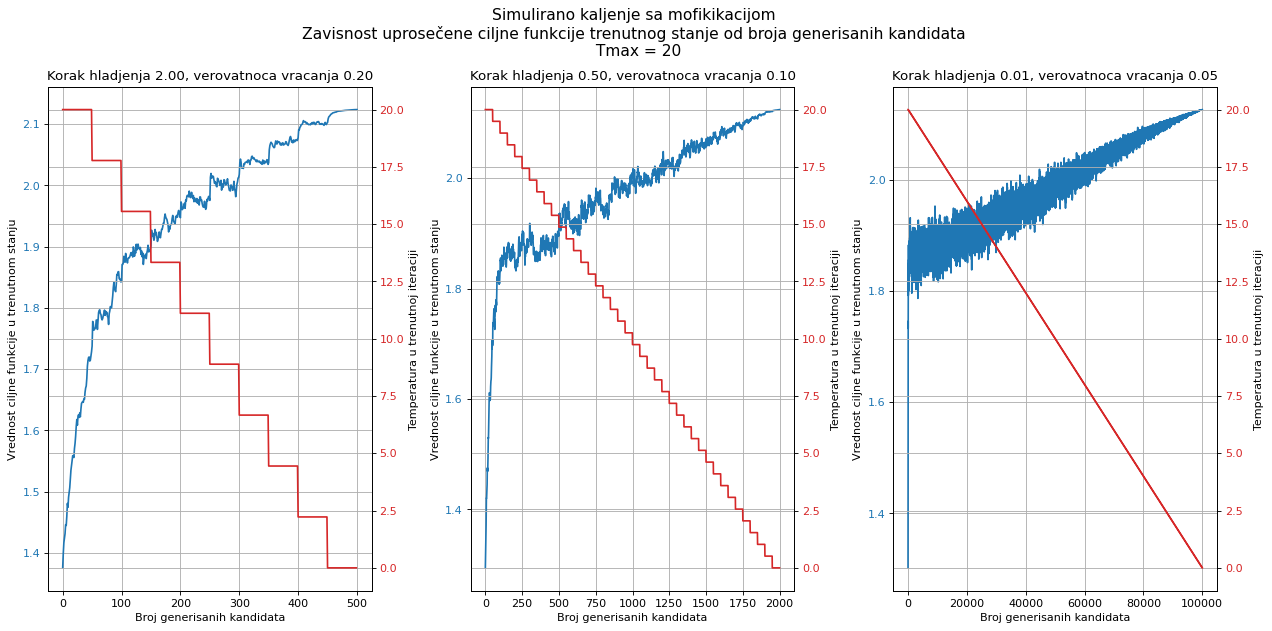

In [12]:
### ISCRTAVANJE REZULTATA ZA EKSPERIMENT SA SIMULIRANIM KALJENJEM sa MODIFIKACIJIJOM
# formiranje listi potrebnih za iscrtavanje
propabilities = [0.2, 0.1, 0.05]
iterations = []
coolings = []
for cooling_step in cooling_steps:
    iterations.append(np.arange(0,int((Tmax/cooling_step)*num_iter+1)))

    cooling_process = cooling_schedule(Tmax, cooling_step )

    extended_cooling = []

    for i in range(len(cooling_process) * num_iter):
        extended_cooling.append(cooling_process[i//num_iter][1])
        
    coolings.append(np.array(extended_cooling))
    
# iscrtavanje grafika i temperature
fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize= (16,8), dpi = 80)
ax = axes.ravel()
plt.suptitle('Simulirano kaljenje sa mofikikacijom \n' + \
             'Zavisnost uprosečene ciljne funkcije trenutnog stanje od broja generisanih kandidata \n Tmax = ' + str(Tmax), fontsize = 14)

for i in range(len(cooling_steps)):
    ax[i].plot(np.array(iterations[i]), exp_states[i])
    
    ax[i].tick_params(axis='y', labelcolor='tab:blue')    
    ax[i].set_title("Korak hladjenja %.2f, verovatnoca vracanja %.2f" %(cooling_steps[i], propabilities[i]))
    ax[i].set_ylabel('Vrednost ciljne funkcije u trenutnom stanju')
    ax[i].set_xlabel('Broj generisanih kandidata')
    ax[i].grid('minor')
    
    ax2 = ax[i].twinx()
    
    ax2.tick_params(axis='y', labelcolor='tab:red')    
    ax2.plot(np.arange(0,len(coolings[i])), coolings[i], color = 'tab:red')
    ax2.set_ylabel('Temperatura u trenutnoj iteraciji')
    ax2.grid('minor')
    
plt.tight_layout()
plt.show()

Rezultati modifikovanog algoritma sa zadatim verovatnocam vracanja na najbolje stanje se ne razlikuju preterano u odnosu na rezultate klasicnog algoritma.

## Poredjenje rada algoritama Simulirano kaljenje i Simulirano kaljenje sa modifikacijom

Realizacija 100/100


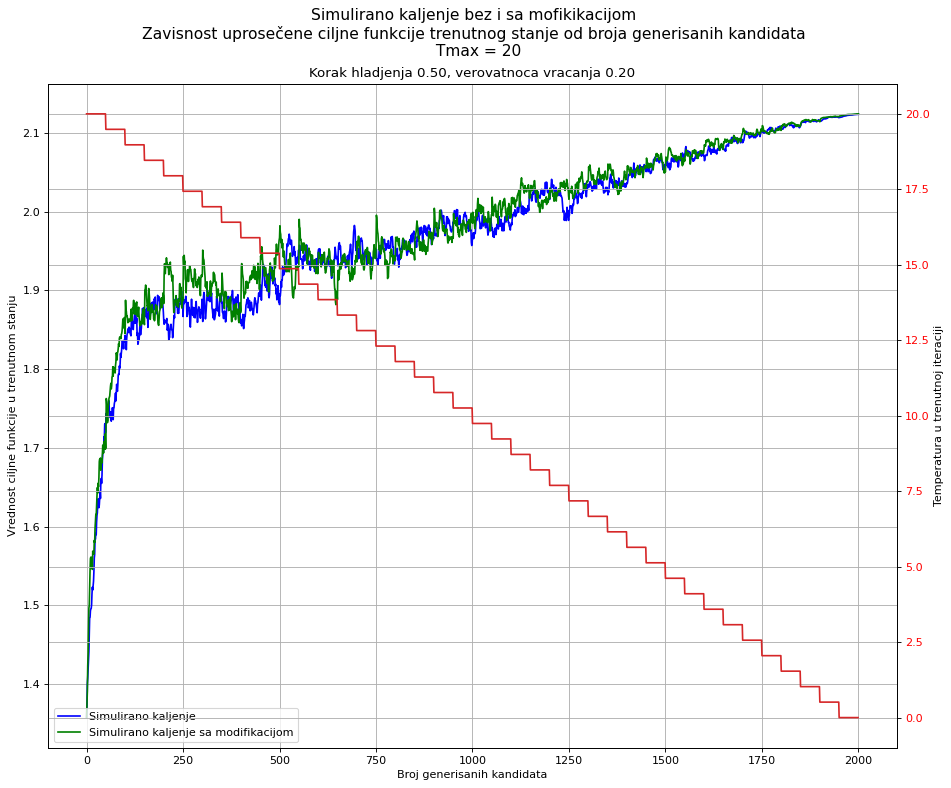

In [13]:
### UPOREDJIVANJE ALGORITAM SIMULAIRANO KALJENJE I SIMULIRANO KALJENJE SA MODIFIKICIJOM

# maksimalna temperatura
Tmax = 20

# definisanje izabranog koraka za hladjenje
cooling_step = 0.5

# definisanje verovatnoce vracanja u najbolje stanje
propability = 0.2

# definisanje broja iteracija
num_iter = 50

# broj eksperimenata
N_exp = 100

# lista srednjih vrednosti ciljne funkcije za klasican SK
exp_states_sa = []

# lista srednjih vrednosti ciljne funkcije za SK sa modifikacijom
exp_states_sam = []
    
# kreriranje raspored hladjenja
cool = cooling_schedule(Tmax, cooling_step)

# inicijalizacije niza vrednosti ciljne funkcije SK
states_sa = np.zeros((1, int((Tmax/cooling_step)* num_iter+1)))

# inicijalizacije niza vrednosti ciljne funkcije SK + m
states_sam = np.zeros((1, int((Tmax/cooling_step)* num_iter+1)))

# prolazak kroz realizacije
for i in range(N_exp):

    # ispis trenutne iteracije
    if (i != (N_exp-1)):
        print("Realizacija %d/%d" %(i+1,N_exp), end='\r')
    else:
        print("Realizacija %d/%d" %(i+1,N_exp), end='\n')

    # pocetno stanje od koga krecemo sa ovim algoritmom
    x_init = random.random()*2-1
    y_init = random.random()*2-1

    init_state = [x_init, y_init]
    
    # koristimo isto pocetno stanje za oba algoritma

    # poziv funkcije za klasicno simulirano kaljenje
    best_state, best_state_objective_value, states_list, it =  simulated_annealing(init_state, cool, num_iter, print_display = False)

    # pakovanje rezultata
    states_sa += np.array(states_list).reshape((1,int((Tmax/cooling_step)* num_iter+1)))
    
    # poziv funkcije za simulirano kaljenje sa vracanjem na najbolje stanje
    best_state, best_state_objective_value, states_list, it =  simulated_annealing(init_state, cool, num_iter, propability, print_display = False)

    # pakovanje rezultata
    states_sam += np.array(states_list).reshape((1,int((Tmax/cooling_step)* num_iter+1)))

# usrednjavanje po realizacijama
exp_states_sa.append((states_sa/N_exp).flatten().tolist())

# usrednjavanje po realizacijama
exp_states_sam.append((states_sam/N_exp).flatten().tolist())

# transforamcija liste u niz
exp_states_sa = np.array(exp_states_sa)
exp_states_sam = np.array(exp_states_sam)

# formiranje listi za iscrtavanje rezultata
coolings = []

iterations = np.arange(0,int((Tmax/cooling_step)*num_iter+1))

cooling_process = cooling_schedule(Tmax, cooling_step )

cooling = []

for i in range(len(cooling_process) * num_iter):
    cooling.append(cooling_process[i//num_iter][1])

# iscrtavanje rezultata
fig = plt.figure(figsize= (12,10), dpi = 80)
plt.suptitle('Simulirano kaljenje bez i sa mofikikacijom \n' + \
             'Zavisnost uprosečene ciljne funkcije trenutnog stanje od broja generisanih kandidata \n Tmax = ' + str(Tmax), fontsize = 14)

plt.plot(iterations, exp_states_sa[0],'b')
plt.plot(iterations, exp_states_sam[0], 'g')
plt.title("Korak hladjenja %.2f, verovatnoca vracanja %.2f" %(cooling_step, propability))
plt.ylabel('Vrednost ciljne funkcije u trenutnom stanju')
plt.xlabel('Broj generisanih kandidata')
plt.legend(['Simulirano kaljenje', 'Simulirano kaljenje sa modifikacijom'], loc = 'lower left')
plt.grid('minor')

ax2 = plt.twinx()

ax2.tick_params(axis='y', labelcolor='r')    
ax2.plot(np.arange(0,len(cooling)), cooling, color = 'tab:red')
ax2.set_ylabel('Temperatura u trenutnoj iteraciji')
ax2.grid('minor')
    
plt.tight_layout()
plt.show()

Sa dobijenog grafika kojim su predstavljene performanse ove dve varijante algoritma Simulirano kaljenje se moze uociti da je SK sa modifikacijom za nijansu bolji od klasicnog SK algoritma, obzirom da se moze primetiti na istim iteracijama SKM (simulirano kaljenje sa modifikacijom) ima vece vrednosti usrednjene ciljne funkcije, dakle malo je gramziviji, jer se povremeno vrati u najbolje stanje, pa tako konzervira neke greske kojim bi SK algoritam mogao da podje u totalnu drugu stranu, dakle da ne ide prema maksimumu ciljne funkcije. Takodje, sto je odlika klasicnog SK algoritma, primetno je da opadanjem temperature algoritam postaje sve gramziviji, dakle prihvata samo bolja resenje, pa se tako krajnje resenje nalazi u maksimumu, ili nekoj okolini njega. Jos jedna odlika je da optimalno resenje koje SKM pronadje je uvek bolje ili jednako od onog koji SK pronadje.

# Pretraga po snopu

Problem je potrebno resiti pretragom po snopu ali na najjeftiniji nacin, dakle potrebno odabrati velicinu populacije koja nije prevelika, vec neka optimalna i broj iteracija algoritma koji je adekvatan tako da  PPS moze da dodje do resenja. Nakon svake iteracije algoritma, ovako formiran algoritam uzima isti broj naslednika kao i pocetna populacija (jedan hiperparametar algoritma). Pokazace se da velicina populacije od oko 10 do 20 i broj iteracija od oko 50 do 100 cine ovaj algoritam za ovaj problem optimalnim i jeftinim.

In [14]:
# funckija - implementacija algoritma lokalne pretrage po snopu
def local_beam_search(k, num_iter, print_display = True, tolerancy = 1e-5):
    
    """
    Opis: 
        Funkcija predstavlja implementaciju algoritma lokalne 
        pretrage po snopu.
        
    Parametri:
        k - velicina populacije koja se generise u svakoj iteraciji
        num_iter - broj iteracija algoritma
        print_display - parametar za prikazivanje printova
        tolerancy - parametar kojim se definise tolerancija iznalazenja najboljeg stanja
        
        **** Default vrednost parametra print_display je True.
        **** Default vrednost parametra tolerancy je postavljena na 10^-5.
             
    Funkcija vraca najbolje stanje, dakle ono u kojem je pronasla maksimalnu vrednost ciljne funkcije
    ili neku vrednost vrlo blizu maksimalne, listu usrednjenih vrednosti po populacijama i broj iteracije
    u kojoj je algoritam pronasao najbolje stanje. 
    Pored toga funkcija vracanja i listu usrednjenih stanja po populacijama i broj iteracija do optimalnog resenja.
    
    """
    
    # na pocetku algortima generisemo k pocetnih stanja
    # posto kod ovog algoritma ne moramo da kao parametar funkcije
    # prosledjujemo neko pocetno stanje
    current_states = multiple_successor_select(None, k)
    
    # inicijalizacija promenljivih za cuvanje 
    # najboljeg stanja i najbolje vrednosti ciljne funkcije
    best_state = None
    best_objective_value = 0
    
    # inicijalizacija liste za cuvanje srednjih vrednosti populacija
    # po iteracijama 
    mean_values = [np.mean([objective_function(current_state[0], current_state[1]) for current_state in current_states])]
    
    # pracenje broja generisanih kandidata do iznalazenja najoptimalnijeg resenja kroz iteracije
    best_iteration = 0
    
    # glavna petlja algoritma
    for i in range(num_iter):
    
        # inicijalizacija liste za cuvanje novih stanja
        new_states = []

        # inicijalizacija liste za cuvanje vrednosti ciljne funkcije
        new_objective_values = []

        # za svakog od stanja iz liste trenutnih/pocetnih stanja
        # generisemo za svakog od stanja po k naslednika tog stanja
        for j in range(k):
            new_states += multiple_successor_select(current_states[j], k)

        # iz liste koja sadrzi svih k^2 stanja za svakog naslednika
        # racunamo vrednost ciljne funkcije i cuvamo ih u listi 
        for j in range(len(new_states)):
            objective_value = objective_function(new_states[j][0], new_states[j][1])

            new_objective_values.append([objective_value, new_states[j]])
            
            # u toku proslaska kroz naslednike odredjujemo najboljeg 
            # naslednika koji ima najbolju vrednost ciljne funkcije
            if (objective_value - best_objective_value) > tolerancy:
                best_state = new_states[j]
                best_objective_value = objective_value
                
                best_iteration = i
                
                if print_display == True:
                    print('Novo najbolje stanje -> iteracija = ' + str(i) + ', vrednost = %.5f' %best_objective_value)

        # sortiranje liste za cuvanje vrednosti ciljne funkcije
        # nerastuce, tako da se u trenutnoj iteraciji najbolje
        # stanje cuva kao prvo u ovoj listi
        new_objective_values.sort(reverse = True)

        # praznjenje liste trenutnih stanja
        current_states = []

        # dodavanje najboljih k naslednika u listu trenutnih stanja
        for j in range(k):
            current_states.append(new_objective_values[j][1])
        
        # dodavanje srednje vrednosti po trenutnoj 
        mean_values.append(np.mean([objective_function(current_state[0], current_state[1]) for current_state in current_states]))
    
    return [best_state, best_objective_value, mean_values, best_iteration]
    

## Prikaz rezultata algoritma pretraga po snopu

In [15]:
### TESTIRANJE RADA ALGORITMA LOKALNA PRETRAGA PO SNOPU

# definisanje velicine populacije
k = 10

# definisanje broja iteracija
num_iter = 100

print('##################################################################')
print('##################################################################')
print('------------------- Lokalna pretraga po snopu --------------------')
print('------------------------------------------------------------------')
print('Velicina populacije: ' + str(k))
print('Broj iteracija: ' + str(num_iter))
print('Broj kandidata nakon svake iteracije: ' + str(k))
print('------------------------------------------------------------------')
local_beam_result, local_beam_maxima, mean_values, iteration = local_beam_search(k, num_iter)
print('------------------------------------------------------------------')
print('Pronadjena najbolja vrednost ciljne funkcije iznosi ' + "{:.5f}".format(local_beam_maxima))
print('Iteracija u kojoj je najbolja vrednost pronadjena: ' + str(iteration) + '/' + str(num_iter))
print('Broj generisanih kandidata do pronalaska najbolje vrednosti: ' + str(iteration * k))
print('Vrednost x i y za dobijeni maksimum su : x = ' + "{:.5f}".format(local_beam_result[0]) + ' y = ' + "{:.5f}".format(local_beam_result[1]))


##################################################################
##################################################################
------------------- Lokalna pretraga po snopu --------------------
------------------------------------------------------------------
Velicina populacije: 10
Broj iteracija: 100
Broj kandidata nakon svake iteracije: 10
------------------------------------------------------------------
Novo najbolje stanje -> iteracija = 0, vrednost = 1.25732
Novo najbolje stanje -> iteracija = 0, vrednost = 1.42074
Novo najbolje stanje -> iteracija = 0, vrednost = 1.46518
Novo najbolje stanje -> iteracija = 0, vrednost = 1.50476
Novo najbolje stanje -> iteracija = 0, vrednost = 1.51501
Novo najbolje stanje -> iteracija = 0, vrednost = 1.65677
Novo najbolje stanje -> iteracija = 0, vrednost = 1.69295
Novo najbolje stanje -> iteracija = 0, vrednost = 1.70033
Novo najbolje stanje -> iteracija = 0, vrednost = 1.98149
Novo najbolje stanje -> iteracija = 0, vrednost = 2.08881


In [16]:
### FORMIRANJE EKSPERIMENTA ZA ALGORITAM LOKALNA PRETRAGA PO SNOPU

# definisanje velicine populacije
k_num = [5, 20, 50]

# definisanje broja iteracija
num_iter = 20

# broj eksperimenata
N_exp = 100

# lista srednjih vrednosti ciljne funkcije po populacijama
exp_means = []

# lista za iteracije do optimuma za sve velicine populacija
iterations = []

# prolazak kroz razlicite velicine populacija
for k in k_num: 
    
    # inicijalizacija promenljive za pracenje broja iteracija do optimuma
    it_opt = 0
    
    # inicijalizacije niza za srednje vrednosti
    means = np.zeros((1,num_iter+1))
    
    # prolazak kroz realizacije
    for i in range(N_exp):
        
        # ispis trenutne iteracije
        if (i != (N_exp-1)):
            print("Populacija %d, Realizacija %d/%d" %(k,i+1,N_exp), end='\r')
        else:
            print("Populacija %d, Realizacija %d/%d" %(k,i+1,N_exp), end='\n')
        
        # poziv funkcije pretrage po snopu
        local_beam_result, local_beam_maxima, mean_values, it = local_beam_search(k, num_iter, False)

        means += np.array(mean_values).reshape((1,num_iter+1))
        it_opt += it
    
    # usrednjavanje po realizacijama
    exp_means.append((means/N_exp).flatten().tolist())
    
    # usrednjavanje iteracije do optimuma
    iterations.append(it_opt//N_exp)    

Populacija 5, Realizacija 100/100
Populacija 20, Realizacija 100/100
Populacija 50, Realizacija 100/100


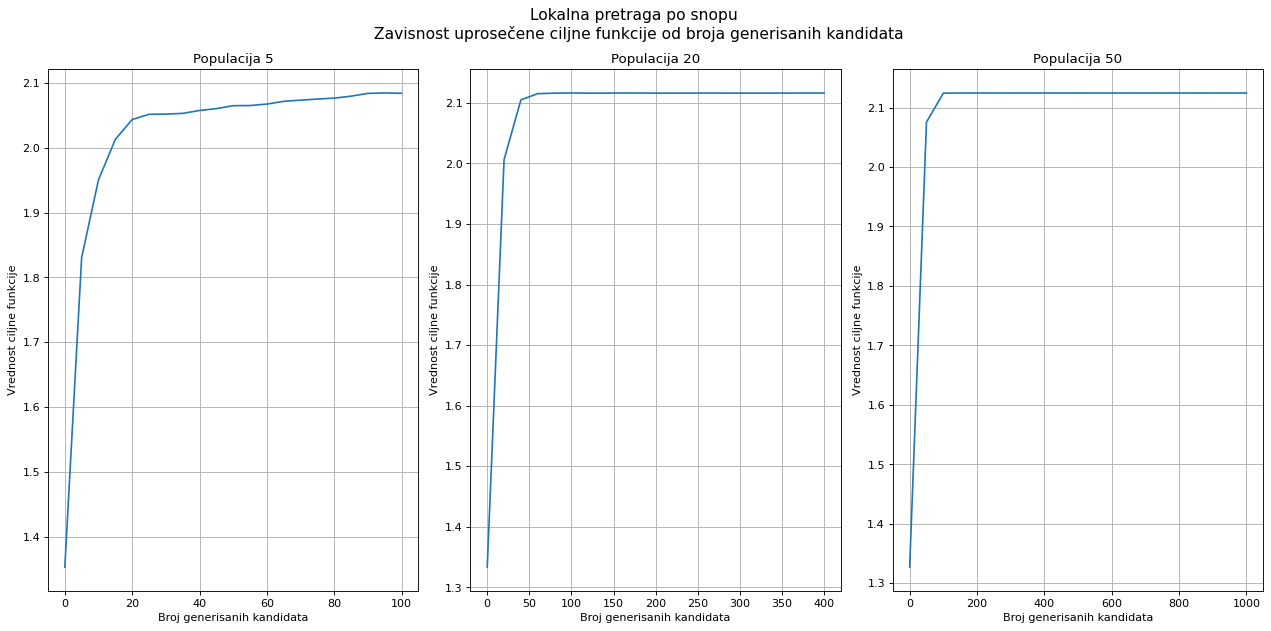

In [17]:
### ISCRTAVANJE REZULTATA ZA EKSPERIMENT SA LOKALNOM PRETRAGOM PO SNOPU
generations = np.ones((3, num_iter+1))
for i in range(len(k_num)):
    generations[i, :] = np.arange(0,num_iter+1) * k_num[i]
    
fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize= (16,8), dpi = 80)
ax = axes.ravel()
plt.suptitle('Lokalna pretraga po snopu \n Zavisnost uprosečene ciljne funkcije od broja generisanih kandidata', fontsize = 14)

for i in range(len(k_num)):
    ax[i].plot(generations[i, :], exp_means[i])
    ax[i].set_title("Populacija %d" %k_num[i])
    ax[i].set_ylabel('Vrednost ciljne funkcije')
    ax[i].set_xlabel('Broj generisanih kandidata')
    ax[i].grid('minor')
    
plt.tight_layout()
plt.show()

Sa dobijenih grafika zavisnosti uprosecene ciljne funkcije po realizacijama i po generacijama vidimo da se PPS algoritam muci da dodje do maksimalnog stanja kod male populacije i to sa 20 iteracija, dok kod adekvatne pa i prevelike populacije, PPS vrlo brzo dodje do optimalne vrednosti ciljne funkcije. Ovo se dalo i ocekivati, posto je PPS sam po sebi pomalo gramziv jer uzima samo najbolje vrednosti iz generacije, a takodje postoji neki vid 'komunikacije' izmedju stanja koji imaju razlicite pretke, dakle postoju se svi ucesnici sa istom merom i za sledecu generaciju se biraju najbolji.

In [18]:
print('Prosecan broj kandidata do nalazenja najboljeg resenja:')
print('----------------------------------------------------------')
for i in range(len(k_num)):
    print('Velicina populacije: ' + str(k_num[i]))
    print('Prosecan broj iteracije u kojoj je pronadjeno resenje: ' + str(iterations[i]) + '/' + str(num_iter))
    print('Prosecan broj generisanih kandidata do najboljeg resenja: ' + str(k_num[i] * iterations[i]))
    print('----------------------------------------------------------')

Prosecan broj kandidata do nalazenja najboljeg resenja:
----------------------------------------------------------
Velicina populacije: 5
Prosecan broj iteracije u kojoj je pronadjeno resenje: 11/20
Prosecan broj generisanih kandidata do najboljeg resenja: 55
----------------------------------------------------------
Velicina populacije: 20
Prosecan broj iteracije u kojoj je pronadjeno resenje: 8/20
Prosecan broj generisanih kandidata do najboljeg resenja: 160
----------------------------------------------------------
Velicina populacije: 50
Prosecan broj iteracije u kojoj je pronadjeno resenje: 4/20
Prosecan broj generisanih kandidata do najboljeg resenja: 200
----------------------------------------------------------


Iz prilozenih rezulata vidimo da se prosecan broj iteracija u kojima algoritam PPS nadje optimalno stanje smanjuje, sto je ocekivano, medjutim, posto su velicine populacije vece, onda je i broj generisanih kandidata veci. Ovakva zavisnost je odlika ovog algoritma.

# Genetski algoritam

Formirana su dva zasebna hromozoma - X i Y kojima su predstavljene vrednosti x i y koordinata diskretizovanih osa. Kodiranje izvrseno binarno na 10 bita. Dakle svaki hromozom ima 10 bita, posto je osa diskretizovana sa istim tim brojem. Broj bita veci od 10 ima vrlo slicne performanse ali je hardverski zahtevniji, pa je 10 bita optimalna vrednost. 
Kod ovog algoritma, ali i kod ostalih se moglo pristupiti jednostavnijem pristupu, a to je da se nadje 1 maksimum ove ciljne funkcije, odnosno da se posmatra samo pozitivan deo x i y ose, posto je funkcija parna po obe ose. Na kraju bi svakako prosecna prilagodjenost generacija ovog algoritma trebalo da bude bliska maksimalnoj (u ovoj konkretnoj implementaciji se dobija vrednost prosecne prilagodjenosti generacija od oko 2). 
Selekcija je implementirana pomocu dva pristupa : generacijski jaz i otezinjenost izbora jedinki. To znaci da se neki procenat (konkretno 20%) najbojih jedniki iz stare generacije prenosi u sledecu generaciju, a da se za ostalih 80% uzimaju najbolje izabrane jedinke, ciji je proces selekcije imao vrednosti tezina formiranih prema njhovim uspesnostima. 
Ukrstanje se vrsi medju zasebnim hromozomima, dakle posebno se ukrstaju X i Y hromozomi, pri cemu se vodi racuna o znaku x i y koordinata; ukrstanje nece promeniti znak x, odnosno y koordinata. 
Mutacija se uvek vrsi sa nekom vrlo malom verovatnocom i to posebno za svaki hromozom, opet se vodi racuna da se znak ne mutira.

Za razliku od PPS ovaj algoritam nije hardverski zahtevan, jer se broj opetacija ne povecava kroz iteracije, pa se sa dovoljno velikom pocetnom populacijom (npr. od 50 do 100 jedinki) kroz otprilike 30-40 iteracija dolazi do optimalnog resenja.

PPS je po kriterijumu broja kandidata koje potrebno generisati efikasnija od GA, jer GA treba dosta iteracija da bi se prilagodjenost populacije popela do okoline maksimuma ciljne funkcije, dakle nema previse 'komunikacije' medju jedinkama iako se selekcijom bira neka vecina najbojih (mutacija moze vrlo lako to da poremeti).

In [19]:
# funkcija za generisanje pocetne populacije u genetskom algortimu
def generate_population(count):
    
    """
    Opis: 
        Funkcija generise populaciju za genetski algoritam. Velicina 
        populacije odredjena je ulaznim parametrom funkcije. Populacija se
        generise nad diskretizovanim XY prostrom. Svaka jedinka je predstavljena
        sa dva hromozoma u binarnom zapisu kod kojeg prvi jednoznacno predstavlja
        njenu x koordinatu, a drugi jednoznacno predstavlja njenu y koordinatu.
        
    Parametri:
        count - velicina populacije koja se generise na pocetku genetskog algoritma
             
    Funkcija vraca listu sa pocetnom populacijom kog genetskog algoritma.
    Svaka jedinka iz populacije ima dva hromozoma kojim su definisane
    x i y koordinate diskretizovanog prostora. 
    
    """
    
    # globalne promenljive broja tacaka diskretizovanih osa
    # i broj bita prema kojem je osa diskretizovana
    global points, num_bits
    
    # inicijalizacija liste za populaciju
    population = []
    
    # glavna petlja za generisanje populacije
    for i in range(count):
        
        # generise 2 slucajna broja u rasponu od 0 do 2^num_bits -1 , odnosno
        # od 0 do points-1 
        
        # ta dva broja predstavljaju indekse x i y promenljivih u 
        # diskretizovanim x i y osama i ta dva indeksa jednoznacno 
        # odredjuju vrednosti ovih koordinata koje posle jednoznacno 
        # odredjuju vrednosti ciljne funkcije
        x_index = random.randint(0, points-1)
        y_index = random.randint(0, points-1)
        
        # formiranje string za gen X u binarnom zapisu
        gene_x = bin(x_index).replace('0b', '')
        
        # dodavanje nula ispred X-gena ukoliko on nema 'num_bits' bita 
        if len(gene_x) < num_bits:
            while len(gene_x) < num_bits:
                gene_x = '0' + gene_x
        
        # formiranje string za gen Y u binarnom zapisu
        gene_y = bin(y_index).replace('0b', '')
        
        # dodavanje nula ispred X-gena ukoliko on nema 'num_bits' bita 
        if len(gene_y) < num_bits:
            while len(gene_y) < num_bits:
                gene_y = '0' + gene_y
           
        # formiranje hromozoma kao spojenog X i Y gena
        chromosome = [gene_x, gene_y]
        
        # dodavanje hromozoma u populaciju
        population.append(chromosome)
    
    return population

# funkcija za selekciju jedinke iz populacije
def selection(population, weights, last_selected, interrupt_loop_counter = 20):
    
    """
    Opis: 
        Funkcija vrsi izbor jedne jedinke iz skupa populacije
        na osnovu uspesnosti cele populacije. 
        
    Parametri:
        population - populacija u toku jedne iteracije genetskog algoritma
        weights - tezine te populacije (tezina za svaku jedinku je broj iz intervala
                  [0,100] koji zapravo predstavlja verovatnocu izbora te jedinke - sto je ovaj 
                  broj veci, to je jedinka bliza maksimumu ciljne funkcije, pa je njena 
                  verovatnoca velika)
        last_selected - jedinka koja je prethodno izabrana (sluzi da se ne bi jedna ista
                        jedinka ukrstili sa samom sobom)
        interrupt_loop_counter - broj iteracija while petlje za promenu 
                                 izabrane jedinke u slucaju da vec izabrana ista jedinka
                                 (da ne bi dolazilo do uksratanja iste jedinke sa samom sobom)
        **** Default vrednost parametra interrupt_loop_counter je postavljena na 20.
             
    Funkcija vraca jednu izabranu jedinku iz skupa populacije.
    
    """
    # generise se lista indeksa od 0 do duzine populacije
    indeces = (np.arange(0,len(population))).tolist()
    
    ### dakle, ideja je da se na osnovu tezina koje su izracunate za svaku jedinku iz populacije
    ### vrsi izbor/selekcija jedinke, pri tome vodimo racuna dve jedinke koje su selektovane,
    ### koje cine par roditelja, ne budu ista jedinka
    
    # selektujemo jedan indeks iz liste indeksa i to sa prosledjenim tezinama
    selected_index = random.choices(indeces, weights, k=1)
    # uzimamo jedinku iz populacije koja ima selektovani indeks
    selected = population[selected_index[0]]

    # ukoliko se radi o drugom roditelju, i i dobili smo
    # da je drugi roditelj jednak prvom, onda pokrecemo jednu
    # ogranicenu while petlju da pokusamo da nadjemo drugog roditelja
    # koji se razlikuje od prvog
    if (last_selected != None) and (selected == last_selected):
        
        # inicijalizacija brojaca za ogranicenu while petlju
        # petlja je ogranicena da sa inzenjerskom odlukom
        # da se ovaj problem ne bi izvrsavao previse
        # ukoliko dodje do toga da je nemoguce da se iznadje
        # razlicit roditelj, prihvatamo istog roditelja, svakako
        # cemo ga mutirati 
        cnt = 0
        while cnt < interrupt_loop_counter:

            # ponovo uzimamo novu jedinku iz liste otezinjenih jedinki
            selected_index = random.choices(indeces, weights, k=1)
            selected = population[selected_index[0]]

            # opet proveravamo da li se dvaju roditelja razlikuju
            # i ukoliko je to tacno, onda brejkujemo u while petlju
            # vracamo selektovanog novog roditelja
            if selected != last_selected:
                break  
            cnt += 1
            
        # za slucaj da nikako ne mozemo da uspemo u iznalazenju nove jedinke
        # kao drugog roditelja, jednostavno ponovi tu jedinku i sve 
        # sto kod ovog algoritma jeste ostaje da se menja jeste mutacije duplirane
        # jedinke

    return selected

# fukcija za ukrstanje dvaju roditlja i dobijanje novih jedinki-dece
def crossover(parent_1, parent_2):
    
    """
    Opis: 
        Funkcija vrsi ukrstanje dve jedinke tako sto na slucajnoj
        poziciji u X i Y genu, za svaki od njihovih gena, gen
        isece na dva podgena i tako ukrste dva roditelja. 
        
    Parametri:
        parent_1 - prvi roditelj
        parent_2 - drugi roditelj
             
    Funkcija vraca listu sa dvoje dece od prosledjenih dvoje roditelja. 
    Kod dece su ukrsteni hromozomi roditelja.
    
    """
    
    # deca su na pocetku ciste kopije roditelja
    child_1_x = parent_1[0]
    child_1_y = parent_1[1]
    
    child_2_x = parent_2[0]
    child_2_y = parent_2[1]
    
    # generisemo slucajne pozicije u x i y genima na kojima vrsimo
    # isecanje hromozoma, ne uzimamo u obzir prve dve i poslednju poziciju
    # jer tad ukrstanje ne bi imalo smisla, a i ne smemo da ukrstamo znak
    pt_x = random.randint(2, len(parent_1[0])-2)
    
    pt_y = random.randint(2, len(parent_1[1])-2)

    # deca postaju ukrsteni roditelji
    child_1_x = child_1_x[:pt_x] + child_2_x[pt_x:]
    child_1_y = child_1_y[:pt_y] + child_2_y[pt_y:]
    
    child_1 = [child_1_x , child_1_y]
    
    child_2_x = child_2_x[:pt_x] + child_1_x[pt_x:]
    child_2_y = child_2_y[:pt_y] + child_1_y[pt_y:]
    
    child_2 = [child_2_x , child_2_y]
    
    return [child_1, child_2]

# funkcija za mutaciju hromozoma
def mutation(chromosome, p_mut):
    
    """
    Opis: 
        Funkcija vrsi mutaciju prosledjenog hromozoma na slucajan nacin 
        sa malom verovatnocom mutacije za svaki od bita iz gena X i Y.
        Ukoliko se pomocu prosledjene verovatnoce pokaze da se nad nekim bitom
        vrsi mutacija, onda se tu sigurno vrsi mutacija, dakle, svaki bit 
        za koji je odluceno da se mutacija desi se sigurno mutira.
        
    Parametri:
        chromosome - hromozom koji treba mutirati
        p_mut - verovatnoca mutacije za svaki od bita iz hromozoma
             
    Funkcija vraca mutiran hromozom.
    
    """
    
    # globalna promenljiva za broj bita
    global num_bits
    
    # na pocetku je mutiran hromozom isti kao prosledjeni hromozom
    mutated_chromosome = chromosome
    
    # X i Y geni
    x = chromosome[0]
    y = chromosome[1]
    
    mutated_x = x
    mutated_y = y
    
    # petlja za prolazak po svim bitima hromozoma 
    # osim prvog bita, posto ne smemo da diramo znak
    for i in range(1, num_bits):
        
        # generisemo slucajan broj iz intervala [0, 1)
        # ukoliko je on manji od verovatnoce mutacije
        # onda se trenutni bit mutira
        # ukoliko je veci ili jednak toj verovatnoci mutacije, onda se 
        # mutacija tog bita ne vrsi
        if random.random() < p_mut:
            
            # definisemo poziciju trenutnog bita
            position = i
            
            # uzimamo vrednost tog bita - 0 ili 1
            x_part = int(x[position])
            
            # mutiramo taj bit 
            x_part = str(abs(x_part - 1))

            # ubacujemo taj bit na svoju poziciju samo sto je on sada mutiran
            # i to upisujemo u hromozom koji na kraju vracamo kao mutiran hromozom

            if position == num_bits-1:
                mutated_x = mutated_x[0:-1] + x_part

            else :
                mutated_x = mutated_x[0:position] + x_part + mutated_x[position+1:]
                
        # ponavljamo kod za Y gen    
        if random.random() < p_mut:
            
            # definisemo poziciju trenutnog bita
            position = i
            
            # uzimamo vrednost tog bita - 0 ili 1
            y_part = int(y[position])
            
            # mutiramo taj bit 
            y_part = str(abs(y_part - 1))

            # ubacujemo taj bit na svoju poziciju samo sto je on sada mutiran
            # i to upisujemo u hromozom koji na kraju vracamo kao mutiran hromozom

            if position == num_bits-1:
                mutated_y = mutated_y[0:-1] + y_part

            else :
                mutated_y = mutated_y[0:position] + y_part + mutated_y[position+1:]
    
    mutated_chromosome = [mutated_x, mutated_y]
    return mutated_chromosome

# funkcija za dekodovanje hromozoma i pretvaranje istog u x i y koordinatu
def decode(chromosome):
    
    """
    Opis: 
        Funkcija dekoduje prosledjeni hromozom i pretvara ga u vrednosti
        x i y koordinata
        
    Parametri:
        chromosome - hromozom koji treba dekodovati
             
    Funkcija vraca listu [x, y] koja predstavlja dekodovan hromozom
    
    """
    
    # globalne promenljive poterbne za dekodovanje
    global num_bits, x_axis, y_axis
    
    # uzimamo vrednost x-a iz hromozoma
    x_str = chromosome[0]
    # uzimamo vrednost y-a iz hromozoma
    y_str = chromosome[1]
    
    # setovanje pocetnih vrednosti za dekodovanje
    x_index = 0
    y_index = 0
    
    # petlja po svim bitima za x i y parce hromozoma 
    # na osnovu ove petlje se vrsi rekonstrukcija x i y koordinata
    # treba imati u vidu da su hromozomi kodovani tako da 
    # x i y geni predstavljaju njihove indekse u diskretizovanim 
    # osama x_axis i y_axis
    for i in range(num_bits):
        x_index += 2**(num_bits-1-i) * int(x_str[i])
        y_index += 2**(num_bits-1-i) * int(y_str[i])
        
    # rekonstrukcija pravih x i y vrednosti na osnovu 
    # dekodovanih indeksa 
    x = x_axis[x_index]
    y = y_axis[y_index]
    
    return [x, y]

# funkcija - implementacija genetskog algoritma
def genetic_algorithm(num_generations, p_mut, population_count = 100, tolerancy = 1e-5, print_display = True):
    
    """
    Opis: 
        Funkcija predstavlja implementaciju genetskog algoritma za 
        maksimizaciju zadate ciljne funckije.
        
    Parametri:
        num_generations - broj generacija koje algoritam treba da razmotri
        p_mut - verovatnoca za mutaciju
        population_count - velicina pocetne populacije, pa i svih ostalih generacija
        tolerancy - parametar kojim se definise tolerancija iznalazenja najboljeg stanja
        print_display -  parametar za prikazivanje printova
        
        **** Default vrednost parametra population_count je postavljena na 100.
        **** Default vrednost parametra tolerancy je postavljena na 10^-5.
        **** Default vrednost parametra print_display je True.
             
    Funkcija vraca najbolji hromozom koji se pojavio kao onaj koji maksimizira 
    ciljnu funkciju, kao i njegovu vrednost ciljne funkcije.
    
    """
    
    # generisemo populaciju na pocetku algoritma sa
    # prosledjenom velicinom iste
    population = generate_population(population_count)
    
    # incijalizujemo vrednosti promenljivih za pracenje najboljeg hromozoma
    # i njegove vrednosti ciljne funkcije
    best_chromosome = None
    best_objective_value = 0
    
    # inicijalizacija liste za cuvanje srednjih vrednosti populacija
    # po iteracijama 
    mean_values = []
    
    # pracenje broja generisanih jedinki do iznalazenja najoptimalnijeg resenja kroz generacije
    best_generation = 0
    
    # glava petlja za sve generacije 
    for generation in range(num_generations):
        
        # sve hromozome iz trenutne generacije dekodujemo i smestamo u listu
        decoded_chromosomes = [decode(chromosome) for chromosome in population]
        
        # racunamo vrednosti ciljne funkcije za sve hromozome iz generacije i smestamo ih u listu 
        objective_values = [objective_function(decoded_chromosome[0], decoded_chromosome[1]) for decoded_chromosome in decoded_chromosomes]
        
        # cuvanje srednje vrednosti za trenutnu generaciju u listi
        mean_values.append(np.mean(objective_values))
        
        # trazimo najbolji hromozom u trenutnoj generaciju
        for i in range(population_count):
            # njega i njegovu vrednost postavljamo kao najbolju 
            if (objective_values[i] - best_objective_value) > tolerancy:
                best_chromosome, best_objective_value = population[i], objective_values[i]
                
                best_generation = generation
                
                if print_display == True:
                    print("Generacija: %d --> Novi najbolji hromozom = %s, odnosno (x,y) = (%.5f, %.5f), vrednost = %.5f" % \
                      (generation, best_chromosome, decoded_chromosomes[i][0], decoded_chromosomes[i][1], objective_values[i])) 
        
        # formiranje parova 
        for i in range(population_count):
            objective_values[i] = [objective_values[i], population[i]]
            
        # sortiranje liste od najboljih prema najgorim ciljnim vrednostima
        objective_values.sort(reverse = True)
        
        # generacijski jaz - uzimamo 20% najboljih jedinki iz prethodne generacije i
        # njih ne menjamo vec samo prebacujemo u sledecu generaciju
        
        generation_gap_percent = (2*population_count)//10
        rest_of_population_percent = population_count - generation_gap_percent
        
        # inicijalizacija liste za decu trenutne generacije
        children = []
        
        # dakle, uzimamo najbolje iz trenutne generacije i prebacujemo ih u sledecu generaciju 
        for i in range(generation_gap_percent):
            children.append(objective_values[i][1])
        
        # racunanje tezina za sve jedinke iz generacije
        
        # inicijalizacija liste tezina
        weights = []

        # inicijalizacija kumulativne sume vrednosti za ciljne funkcije za sve jedinke
        cumulative_sum = 0

        # petlja za racunanje vrednosti ciljne funkcije 
        # za svaku jedinku iz preostale populacije,
        # dodavanje te vrednosti u kumulativnu sumu i dodavanje te vrednosti 
        # u listu tezina
        for i in range(population_count):
            [x, y] = decode(population[i])

            objective_value = objective_function(x, y)

            cumulative_sum += objective_value

            weights.append(objective_value)

        # normalizacija tezina prema kumulativnoj sumi
        # tako da sad svaka vrednost iz liste tezina predstavlja verovatnocu izbora
        # te jedinke
        for i in range(population_count):
            weights[i] = 100*weights[i]/cumulative_sum  
            
        # inijcializacija liste za izabranu decu
        not_best_children = []
        
        # petlja kroz generaciju, ali u svakoj iteraciji uzimamo
        # dva roditelja, pa je korak ove petlje 2
        for i in range(0,population_count,2):
            
            # uzimamo 2 roditelja selekcijom
            # napravljen je mehanizam da se maksimalno minimalno
            # potrosi vremena da ova dva roditelja ne budu 
            # zapravo ista jedinka
            parent_1 = selection(population,weights,None)
            parent_2 = selection(population,weights,parent_1)
            
            # vrsimo ukrstanje hromozoma dvaju roditelja
            # i dobijemo dete - child
            for child in crossover(parent_1, parent_2):
                # za svako dete vrsimo mutaciju sa prosledjenom 
                # verovatnocom mutacije
                child =  mutation(child, p_mut)
                
                # nakon mutacije, dodajemo mutirano dete u
                # listu za decu
                not_best_children.append(child)
        
        # uzimamo selektovane jedinke koje su ukrstene i mutirane 
        # i od njih uzimamo 80 % najboljih
        decoded_not_best_children = [decode(chromosome) for chromosome in not_best_children]
        
        objective_values_children = [objective_function(decoded_chromosome[0], decoded_chromosome[1]) \
                                     for decoded_chromosome in decoded_not_best_children]
        
        for i in range(population_count):
            objective_values_children[i] = [objective_values_children[i], not_best_children[i]]
        
        objective_values_children.sort(reverse = True)
        
        for i in range(0, rest_of_population_percent):
            children.append(objective_values_children[i][1])
        
        # nakon svih procesa koje genetski algoritam poseduje
        # vrsimo smenu generacija
        # dakle nova trenutna populacija/generacija postaje nova generacija
        # odnosno deca stare populacije
        population = children
    
    return [best_chromosome, best_objective_value, mean_values, best_generation]

## Prikaz kodiranja resenja

In [20]:
count = 10
population = generate_population(count)

print('Slucajno generisana populacija velicine ' + str(count) + ':')
for individual in population:
    decoded = decode(individual)
    objective_value = objective_function(decoded[0], decoded[1])
    print('Hromozom: x gen = ' + individual[0] +  ' y gen = ' + individual[1] + \
          ' --> (x, y) = (%.5f, %.5f) --> vrednost ciljne funkcije = %.5f' %(decoded[0],decoded[1], objective_value))

Slucajno generisana populacija velicine 10:
Hromozom: x gen = 0010001111 y gen = 1011110011 --> (x, y) = (-0.72043, 0.47605) --> vrednost ciljne funkcije = 1.18607
Hromozom: x gen = 0010100110 y gen = 0111111011 --> (x, y) = (-0.67546, -0.00880) --> vrednost ciljne funkcije = 1.48222
Hromozom: x gen = 0100100011 y gen = 0011101111 --> (x, y) = (-0.43109, -0.53275) --> vrednost ciljne funkcije = 1.49123
Hromozom: x gen = 1000011101 y gen = 1100101000 --> (x, y) = (0.05767, 0.57967) --> vrednost ciljne funkcije = 1.69391
Hromozom: x gen = 1101101011 y gen = 0010101011 --> (x, y) = (0.71065, -0.66569) --> vrednost ciljne funkcije = 1.08649
Hromozom: x gen = 1110110001 y gen = 1100111100 --> (x, y) = (0.84751, 0.61877) --> vrednost ciljne funkcije = 0.92112
Hromozom: x gen = 1000110100 y gen = 1010111100 --> (x, y) = (0.10264, 0.36852) --> vrednost ciljne funkcije = 1.76978
Hromozom: x gen = 1001101100 y gen = 0100001101 --> (x, y) = (0.21212, -0.47410) --> vrednost ciljne funkcije = 1.788

## Prikaz rezultata genetskog algoritma

In [21]:
### TESTIRANJE RADA GENETSKOG ALGORITMA

population_count = 100
num_generations = 100
p_mut = 0.08

print('##################################################################')
print('##################################################################')
print('---------------------- Genetski algoritam ------------------------')
print('------------------------------------------------------------------')
print('Velicina populacije: ' + str(population_count))
print('Broj generacija: ' + str(num_generations))
print('Metod selekcije jedinki: otezinjene jedinke u skladu sa njihovim uspehom + generacijski jaz')
print('Verovatnoca mutacije: ' + str(p_mut))
print('------------------------------------------------------------------')
best_chromosome, best_objective_value, mean_values, generation = genetic_algorithm(num_generations, p_mut, population_count)
[x, y] = decode(best_chromosome)
print('------------------------------------------------------------------')
print('Pronadjena maksimalna vrednost ciljne funkcije iznosi ' + "{:.5f}".format(best_objective_value))
print('Generacija u kojoj je najbolja vrednost pronadjena: ' + str(generation) + '/' + str(num_generations))
print('Broj generisanih kandidata do pronalaska najbolje vrednosti: ' + str(generation * population_count))
print('Vrednost x i y za dobijeni maksimum su : x = ' + "{:.5f}".format(x) + ', y = ' + "{:.5f}".format(y))
print('Srednja vrednost: ' + str(np.mean(mean_values)))

##################################################################
##################################################################
---------------------- Genetski algoritam ------------------------
------------------------------------------------------------------
Velicina populacije: 100
Broj generacija: 100
Metod selekcije jedinki: otezinjene jedinke u skladu sa njihovim uspehom + generacijski jaz
Verovatnoca mutacije: 0.08
------------------------------------------------------------------
Generacija: 0 --> Novi najbolji hromozom = ['0110011011', '1010101110'], odnosno (x,y) = (-0.19648, 0.34115), vrednost = 1.88462
Generacija: 0 --> Novi najbolji hromozom = ['1001100011', '0111000011'], odnosno (x,y) = (0.19453, -0.11828), vrednost = 2.07612
Generacija: 1 --> Novi najbolji hromozom = ['1001011110', '1001010101'], odnosno (x,y) = (0.18475, 0.16716), vrednost = 2.12205
Generacija: 4 --> Novi najbolji hromozom = ['1001011110', '1001011111'], odnosno (x,y) = (0.18475, 0.18671), vredn

In [22]:
### FORMIRANJE EKSPERIMENTA ZA GENETSKI ALGORITAM 
 
# definisanje velicine populacije [premala, adekvatna, prevelika]
populations = [10, 50, 200]

# definisanje broja generacija
num_generations = 100

# verovatnoca mutacije
p_mut = 0.1

# broj eksperimenata
N_exp = 100

# lista srednjih vrednosti ciljne funkcije po populacijama
exp_means = []

# lista za iteracije do optimuma za sve velicine populacija
generations_opt = []

# prolazak kroz razlicite velicine populacija
for population_count in populations: 
    
    # inicijalizacija promenljive za pracenje broja generacija do optimuma
    gen_opt = 0
    
    # inicijalizacije niza za srednje vrednosti
    means = np.zeros((1,num_generations))
    
    # prolazak kroz realizacije
    for i in range(N_exp):
        
        # ispis trenutne iteracije
        if (i != (N_exp-1)):
            print("Velicina populacije %d, Realizacija %d/%d" %(population_count,i+1,N_exp), end='\r')
        else:
            print("Velicina populacije %d, Realizacija %d/%d" %(population_count,i+1,N_exp), end='\n')
        
        # poziv funkcije genetskog algoritma
        best_chromosome, best_objective_value, mean_values, gen = genetic_algorithm(num_generations, p_mut, population_count, print_display = False)

        means += np.array(mean_values).reshape((1,num_generations))
        gen_opt += gen
    
    # usrednjavanje po realizacijama
    exp_means.append((means/N_exp).flatten().tolist())
    
    # usrednjavanje iteracije do optimuma
    generations_opt.append(gen_opt//N_exp)

Velicina populacije 10, Realizacija 100/100
Velicina populacije 50, Realizacija 100/100
Velicina populacije 200, Realizacija 100/100


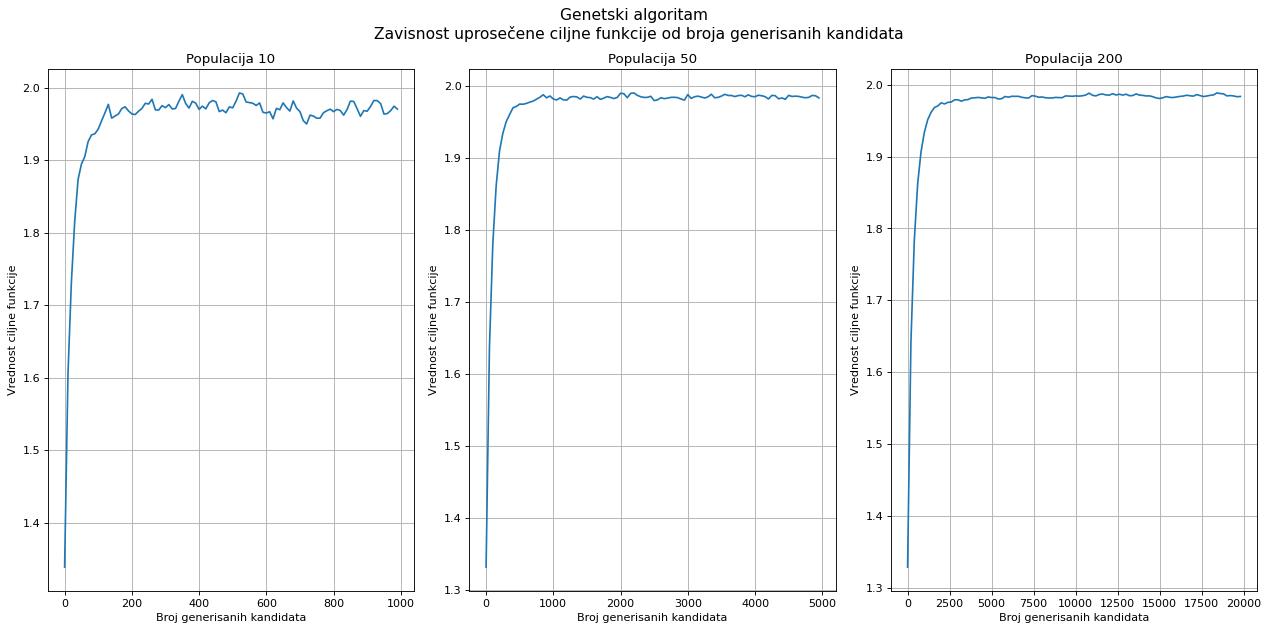

In [23]:
### ISCRTAVANJE REZULTATA ZA EKSPERIMENT SA GENETSKIM ALGORITMOM
generations = np.ones((3, num_generations))
for i in range(len(populations)):
    generations[i, :] = np.arange(0,num_generations) * populations[i]

fig, axes = plt.subplots(ncols = 3, nrows = 1, figsize= (16,8), dpi = 80)
ax = axes.ravel()
plt.suptitle('Genetski algoritam \n Zavisnost uprosečene ciljne funkcije od broja generisanih kandidata', fontsize = 14)

for i in range(len(populations)):
    ax[i].plot(generations[i, :], exp_means[i])
    ax[i].set_title("Populacija %d" %populations[i])
    ax[i].set_ylabel('Vrednost ciljne funkcije')
    ax[i].set_xlabel('Broj generisanih kandidata')
    ax[i].grid('minor')
    
plt.tight_layout()
plt.show()

Sa dobijenih grafika se moze videti da velicina populacije od oko 40 pa sve do 100 jedniki sa oko 50 do 100 generacija moze dovesti do prosecne prilagodjenosti generacija koja je bliska maksimumu. Primentno je prosecna prilagodjenost populacija vec kroz par generacija ne varira mnogo za popoulaijce od 50 pa na vise, dok to nije slucaj kod malih populacija. Nazalost na prilozenim graficima, prilagodjenost je oko 2, dok je maksimum funkcij oko 2.12, sto nije bas najbolje. Problem se verovatno javlja kod rezolucije diskretne ose. Veci broj tacaka bi za nijansu poboljsao algoritam. Takodje, prilikom selekcije nije uspostavljen princip elitizma, pa da se uzimaju neke samo najbolje jedinke, sto takodje moze dovesti do smanjenja prosecne prilagodjenosti. Medjutim, pored svega toga, GA uspeva vrlo dobro da pronadje maksimum ciljne funkcije i sa malom populacijom i to u svim realizacijama eksperimenta.

In [24]:
print('Prosecan broj kandidata do nalazenja najboljeg resenja:')
print('----------------------------------------------------------')
for i in range(len(populations)):
    print('Velicina populacije: ' + str(populations[i]))
    print('Prosecan broj generacija u kojoj je pronadjeno resenje: ' + str(generations_opt[i]) + '/' + str(num_generations))
    print('Prosecan broj generisanih jedinki do najboljeg resenja: ' + str(populations[i] * generations_opt[i]))
    print('----------------------------------------------------------')

Prosecan broj kandidata do nalazenja najboljeg resenja:
----------------------------------------------------------
Velicina populacije: 10
Prosecan broj generacija u kojoj je pronadjeno resenje: 54/100
Prosecan broj generisanih jedinki do najboljeg resenja: 540
----------------------------------------------------------
Velicina populacije: 50
Prosecan broj generacija u kojoj je pronadjeno resenje: 41/100
Prosecan broj generisanih jedinki do najboljeg resenja: 2050
----------------------------------------------------------
Velicina populacije: 200
Prosecan broj generacija u kojoj je pronadjeno resenje: 24/100
Prosecan broj generisanih jedinki do najboljeg resenja: 4800
----------------------------------------------------------


Dakle, kao i kod PPS primetno je da se prosecna iteracija do nalazenja smanjuje povecavanjem velicine populacije, medjutim broj generisanih kandidata raste. Takav rezultat je ocekivan.

# Evaluacija algoritama histogramima

In [28]:
# broj eksperimenata
N_exp = 100

### SIMULIRANO KALJENJE modifikacija

# max temperatura 
Tmax = 20

# najbolji korak hladjenja
cooling_step = 0.5

# formiranje rasporeda hladjenja
cool = cooling_schedule(Tmax, cooling_step)

# broj iteracija algoritma SK+ m
num_iter_sa = 50

# verovatnoca vracanja u najbolje stanje
p_return = 0.1

# lista resenja za sve eksperimente sk-a
exp_solutions_sa = []

# lista za iteracije do optimuma za sve realizacije sk-a
iterations_opt_sa = []

### LOKALNU PRETRAGU PO SNOPU

# definisanje velicine populacije
k = 20

# definisanje broja iteracija
num_iter_lbs = 100

# lista resenja za sve eksperimente pps-a
exp_solutions_lbs = []

# lista za iteracije do optimuma za sve realizacije pps-a
iterations_opt_lbs = []

### GENETSKI ALGORITAM 

# definisanje velicine populacije
population_count = 20

# definisanje broja generacija
num_generations = 100

# verovatnoca mutacije
p_mut = 0.1

# lista resenja za sve eksperimente GA
exp_solutions_ga = []

# lista za iteracije do optimuma za sve realizacije GA
generations_opt_ga = []

# prolazak kroz realizacije
for i in range(N_exp):

    # ispis trenutne iteracije
    print("Realizacija %d/%d" %(i+1,N_exp), end='\r')
    
    # pocetno stanje od koga krecemo sa SK algoritmom
    x_init = random.random()*2-1
    y_init = random.random()*2-1

    init_state = [x_init, y_init]

    # poziv funkcije SK + M
    best_state_sa, best_state_objective_value_sa, states_list, it_sa =  simulated_annealing(init_state,\
                                                                                            cool, num_iter,p_return , print_display = False)
    
    # dodavanje rezultata u liste
    exp_solutions_sa.append(best_state_objective_value_sa)
    iterations_opt_sa.append(it_sa)
    
    # pozivanje funkcije za lokalnu pretragu po snopu
    local_beam_result, local_beam_maxima, mean_values, it_lbs = local_beam_search(k, num_iter_lbs, False)
    
    # dodavanje rezultata u liste
    exp_solutions_lbs.append(local_beam_maxima)
    iterations_opt_lbs.append(it_lbs*k)

    # pozivanje funkcije za genetski algoritam
    best_chromosome, best_objective_value_ga, mean_values, gen = genetic_algorithm(num_generations, p_mut, population_count, print_display = False)

    # dodavanje rezultata u liste
    exp_solutions_ga.append(best_objective_value_ga)
    generations_opt_ga.append(gen*population_count)

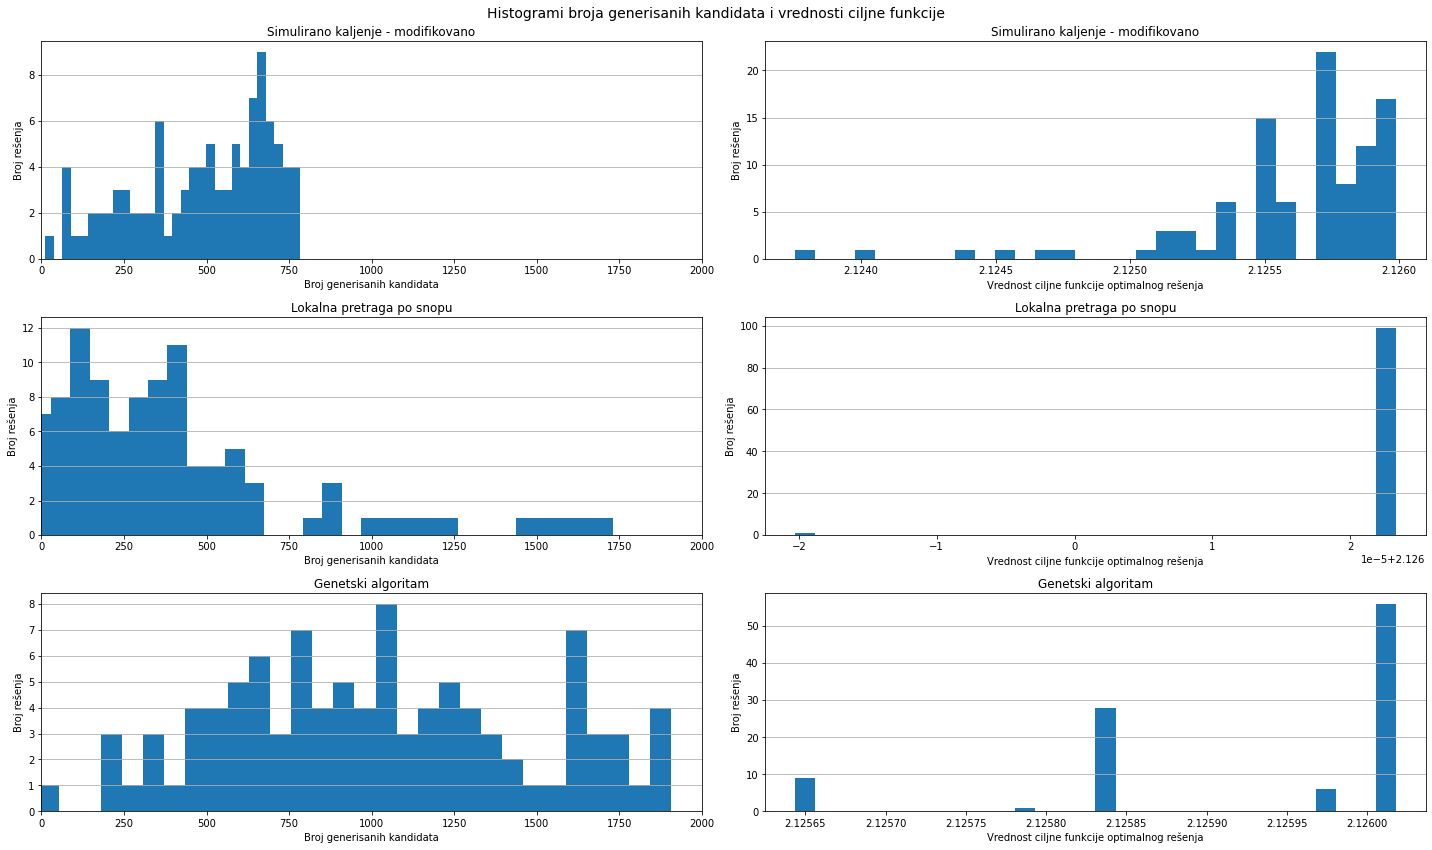

In [29]:
### ISCRTAVANJE HISTOGRAMA REZULTATA
fig, axes = plt.subplots(nrows=3, ncols = 2 ,figsize=(20,12))
ax = axes.ravel()

fig.suptitle('Histogrami broja generisanih kandidata i vrednosti ciljne funkcije', fontsize = 14)

hist, bins = np.histogram(iterations_opt_sa, bins=30, density=False)
width = np.amin(bins[1:]-bins[:-1])
ax[0].bar(bins[:-1], hist, width=width)
ax[0].set_xlabel('Broj generisanih kandidata')
ax[0].set_ylabel('Broj rešenja')
ax[0].set_title('Simulirano kaljenje - modifikovano')
ax[0].set_xlim(0,2000)
ax[0].grid(axis='y')

bins = np.linspace(1.5, 2.13, 100).tolist()
hist, bins = np.histogram(exp_solutions_sa, bins=30, density=False)
width = np.amin(bins[1:]-bins[:-1])
ax[1].bar(bins[:-1], hist, width=width)
ax[1].set_xlabel('Vrednost ciljne funkcije optimalnog rešenja')
ax[1].set_ylabel('Broj rešenja')
ax[1].set_title('Simulirano kaljenje - modifikovano')
ax[1].grid(axis='y')


hist, bins = np.histogram(iterations_opt_lbs, bins=30, density=False)
width = np.amin(bins[1:]-bins[:-1])
ax[2].bar(bins[:-1], hist, width=width)
ax[2].set_xlabel('Broj generisanih kandidata')
ax[2].set_ylabel('Broj rešenja')
ax[2].set_title('Lokalna pretraga po snopu')
ax[2].set_xlim(0,2000)
ax[2].grid(axis='y')

bins = np.linspace(1.5, 2.13, 100).tolist()
hist, bins = np.histogram(exp_solutions_lbs, bins=30, density=False)
width = np.amin(bins[1:]-bins[:-1])
ax[3].bar(bins[:-1], hist, width=width)
ax[3].set_xlabel('Vrednost ciljne funkcije optimalnog rešenja')
ax[3].set_ylabel('Broj rešenja')
ax[3].set_title('Lokalna pretraga po snopu')
ax[3].grid(axis='y')

hist, bins = np.histogram(generations_opt_ga, bins=30, density=False)
width = np.amin(bins[1:]-bins[:-1])
ax[4].bar(bins[:-1], hist, width=width)
ax[4].set_xlabel('Broj generisanih kandidata')
ax[4].set_ylabel('Broj rešenja')
ax[4].set_title('Genetski algoritam')
ax[4].set_xlim(0,2000)
ax[4].grid(axis='y')

bins = np.linspace(1.5, 2.13, 100).tolist()
hist, bins = np.histogram(exp_solutions_ga, bins=30, density=False)
width = np.amin(bins[1:]-bins[:-1])
ax[5].bar(bins[:-1], hist, width=width)
ax[5].set_xlabel('Vrednost ciljne funkcije optimalnog rešenja')
ax[5].set_ylabel('Broj rešenja')
ax[5].set_title('Genetski algoritam')
ax[5].grid(axis='y')

plt.tight_layout()
plt.show()

Iz dobijenih histograma za brojeve generisanih kandidata mozemo zakljuciti da PPS dominantno do optimalnog resenje stize najbrze, odnosno za najmanje generisanih kandidata (ispod 100). GA sa druge strane je vrlo raznovrstan, mada se u najvise slucajeva dobija da se broj generisanih kandidata do optimalnog resenja nalazi oko 800 - 1000. Kod SK je prica drugacija. Ono u svim realizacijama relativno brzo nalazi resenje dok, je dominantna vrednost oko 600 generisanih kandidata.

Sto se tice histograma koji prikazuju koliko realizacija je dobilo optimalno resenje u kojim vrednostima vidimo da PPS u svim realizacijama iznadje isto resenje, odnosno pravi maksimum. GA u otpilike nesto vise od polovini realizacija pronadje pravi maksimum, a u trecini nesto nizu vednost. Sa druge strane algoritam SK je malo vise saren. Otprilike cetvrtina realizacija zavrsi u nekoj tacki vrlo blizu globalnog maksimuma, vecina ostalih realizacija zavrsi u nekoj tacki blizu ovih 25 posto, ali opet sve blizu maksimuma, greske su najvece od 1e-4 za ovu vecinu realizacija.